### Setting up the Module Path

Before we begin with the data processing and analysis, it is crucial to ensure that our notebook has access to custom modules stored in different directories. The following code snippet adjusts the Python path to include the 'src' directory where our custom modules are located. This step is necessary to enable the import and use of modules developed specifically for this project without encountering import errors.

By inserting the path to the 'src' directory into `sys.path`, we seamlessly import any module from the 'src' directory as if they were part of the standard library or local directory.

In [1]:
# Ensure the module path is included in the PYTHONPATH
import sys
import os

# Define the path to the 'src' directory relative to the notebook
src_path = os.path.join(os.path.dirname(os.path.abspath('')), 'src')

# Check if the path is already in sys.path, if not, add it
if src_path not in sys.path:
    sys.path.append(src_path)

### Downloading the CWRU Bearing Dataset

In this section, we retrieve the CWRU (Case Western Reserve University) Bearing Dataset from Kaggle. This dataset is commonly used for predictive maintenance and fault diagnosis in bearings, which is crucial for industrial applications. The function `download_dataset` is imported from the `cwru_data_loading` module, which we previously included in our path.

**Steps to Set Up Kaggle API for Download:**

1. **Obtain API Credentials from Kaggle:**
   - Go to your Kaggle account, navigate to the 'Account' tab from your profile.
   - Scroll to the 'API' section and click on 'Create New API Token'.
   - This will download a `kaggle.json` file containing your API credentials.

2. **Configure the Environment Variable:**
   - Place the `kaggle.json` file in a location on your machine.
   - Set the `KAGGLE_CONFIG_DIR` environment variable to point to the folder containing `kaggle.json`.
   - For example, if your `kaggle.json` is in `C:\Users\Username\.kaggle\`, you would set the environment variable like this on Windows:
     ```bash
     setx KAGGLE_CONFIG_DIR "C:\Users\Username\.kaggle\"
     ```
   - On Unix systems, add the export to your shell configuration file, like `.bashrc` or `.zshrc`:
     ```bash
     export KAGGLE_CONFIG_DIR="/home/username/.kaggle/"
     ```

By setting up the Kaggle API and using the provided function, the dataset is automatically downloaded and unzipped to the specified local directory `../data`, ready for further analysis.

In [2]:
# Import functions from the module
from cwru_data_loading import download_dataset

# Download the dataset to the specified folder
download_dataset('brjapon/cwru-bearing-datasets', '../data')

Dataset URL: https://www.kaggle.com/datasets/brjapon/cwru-bearing-datasets
Dataset downloaded and extracted to: ../data


### Building the Dataset from Raw Files

After downloading the CWRU dataset, we proceed to construct a structured dataset ready for analysis. The `build_dataset` function is used to parse the raw `.mat` files and extract significant features from the bearing vibration signals, making it ready for machine learning applications.

**Steps Involved in Dataset Construction:**

1. **Load Signal Data:**
   - The function reads through `.mat` files, extracting Drive End (DE) and Fan End (FE) vibration signal data.
   
2. **Segmentation:**
   - Each signal is segmented into frames of `2048` points with `50%` overlap between consecutive frames. This segmentation helps in analyzing the signal in manageable parts, capturing transient characteristics.

3. **Feature Extraction:**
   - For each segment, time-domain and frequency-domain features are extracted:
     - Time-domain features might include measures like mean, standard deviation, skewness, etc.
     - Frequency-domain features may cover aspects like mean frequency, spectral kurtosis, etc.
   - The type of features extracted (`time`, `frequency`, or `both`) depends on the `feature_type` parameter.

4. **Data Structuring:**
   - Each data point is labeled with its corresponding `specific_label`, `health_state`, `damage_size`, and `signal_type` derived from the file's name.
   - A comprehensive DataFrame is constructed, which includes labels and extracted features for each segment.

5. **Saving the Data:**
   - The constructed DataFrame is saved as a CSV file for easy access and manipulation in future analyses.
   - This allows for a standardized dataset that can be used across different models and studies.

**Outputs Generated:**
- The first few records of the dataset are displayed to verify its structure.
- A statistical description of the dataset is printed to understand the distribution of features.
- The total number of rows and the occurrences of each class within key columns (`Health State` and `Specific Label`) are shown to give insights into the dataset's composition.

By completing these steps, we ensure that the data is not only accessible but also arranged in a way that is conducive to machine learning workflows, paving the way for in-depth analysis and model training.

In [2]:
# Build the dataset using the downloaded data
from cwru_data_loading import build_dataset

dataset, features_list = build_dataset('../data/raw/', frame_size=2048, overlap=0.5, feature_type='both')

# Show the first few rows of the dataset
print("First few rows of the dataset:")
print(dataset.head())

# Statistical description of the numerical columns
print("\nStatistical Description:")
print(dataset.describe())

# Total number of rows in the dataset
print("\nTotal number of rows:", len(dataset))

# Count the occurrences for each class in the 'Health State' column
print("\nCount of occurrences for each class:")
print(dataset['Health State'].value_counts())

# Count the occurrences for each class in the 'Specific Label' column
print("\nCount of occurrences for each class:")
print(dataset['Specific Label'].value_counts())

# Path to save the CSV file
csv_path = '../data/CWRUdataset.csv'

# Save the DataFrame as a CSV file
dataset.to_csv(csv_path, index=False)

print(f"\nThe dataset has been saved to: {csv_path}")

OSError: Could not find kaggle.json. Make sure it's located in C:\Users\22127\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

### Loading Pre-Processed Dataset

In scenarios where the dataset has already been processed and saved, we can directly load the data from a CSV file. This approach is particularly useful when the data preparation step is time-consuming and we want to avoid repeating the process unnecessarily.

**Procedure:**
- The dataset is loaded into a DataFrame from the CSV file located at `..\data\CWRUdataset.csv`. This file contains the structured data with features and labels prepared from the raw `.mat` files.
- Using `pandas.read_csv`, we ensure that the data is quickly and efficiently loaded into the memory, ready for analysis and model training.

This method is efficient for repeated analyses, allowing for immediate access to the data without the need for re-processing the raw files.

**Note:** This step assumes that the dataset has been previously created and saved correctly in the specified path.

In [3]:
import pandas as pd

dataset = pd.read_csv('..\data\CWRUdataset.csv')

### Data Visualization

Data visualization is a crucial step in understanding the underlying patterns and distributions within the dataset. By visually representing the data, we can gain insights into the characteristics of different features and how they relate to different health states and signal types of bearings.

**Visualizations Included:**
1. **Histograms:** For a selected subset of features, histograms are generated to observe the frequency distribution. This helps in understanding the spread and central tendency of each feature across different specific labels.
   - Features visualized include Mean, Standard Deviation, Mean Absolute Deviation, Root Mean Square, Maximum Absolute Value, Skewness, Kurtosis, Crest Factor, Form Factor, Shape Factor, and Impulse Factor.

2. **Violin Plots:** For a comprehensive view, violin plots for all the features are created to analyze the distribution of values segmented by health state and further split by signal type. This allows us to see the distribution shapes and the prevalence of values, providing insights into the variability and typical values across different conditions.

**Technical Setup:**
- The visualizations leverage the `seaborn` library for plotting, known for its aesthetic presentation and advanced plotting options.
- Each plot is adjusted for better visibility with a set theme and font sizes ensuring that each visualization is clear and interpretable.
- Histograms and violin plots are created using specific functions defined in the `data_visualization` module, which abstracts the complexity of `seaborn` and `matplotlib` setup, making the visualization process straightforward and repeatable.

These visualizations are crucial for the preliminary analysis and ensure that the features selected for model training are understood in terms of their distribution and impact on the models' ability to differentiate between different states of health in bearings.

In [4]:
features_list = ['Mean', 'Standard deviation', 'Mean absolute deviation', 'Root mean square',
                    'Maximum absolute value', 'Skewness', 'Kurtosis', 'Crest factor', 'Form factor',
                    'Shape factor', 'Impulse factor', 'Mean of power spectrum', 'Standard deviation of power spectrum',
                    'Skewness of power spectrum', 'Kurtosis of power spectrum', 'Mean frequency', 'Standard deviation of frequency',
                    'Root mean square frequency', 'Root variance frequency', 'Frequency centroid', 'Frequency variation factor',
                    'Frequency variance', 'Frequency skewness']

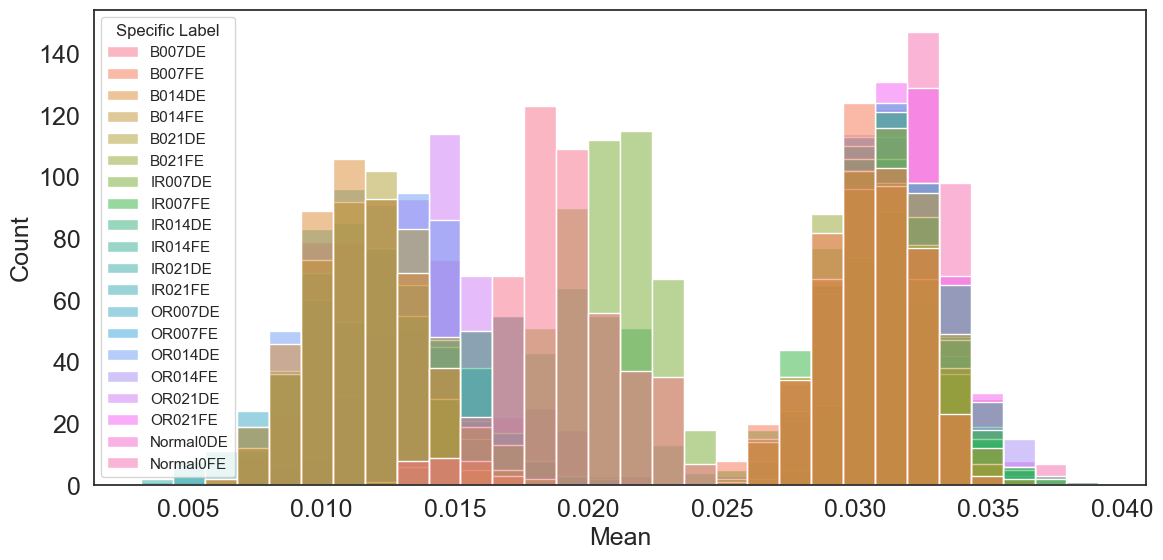

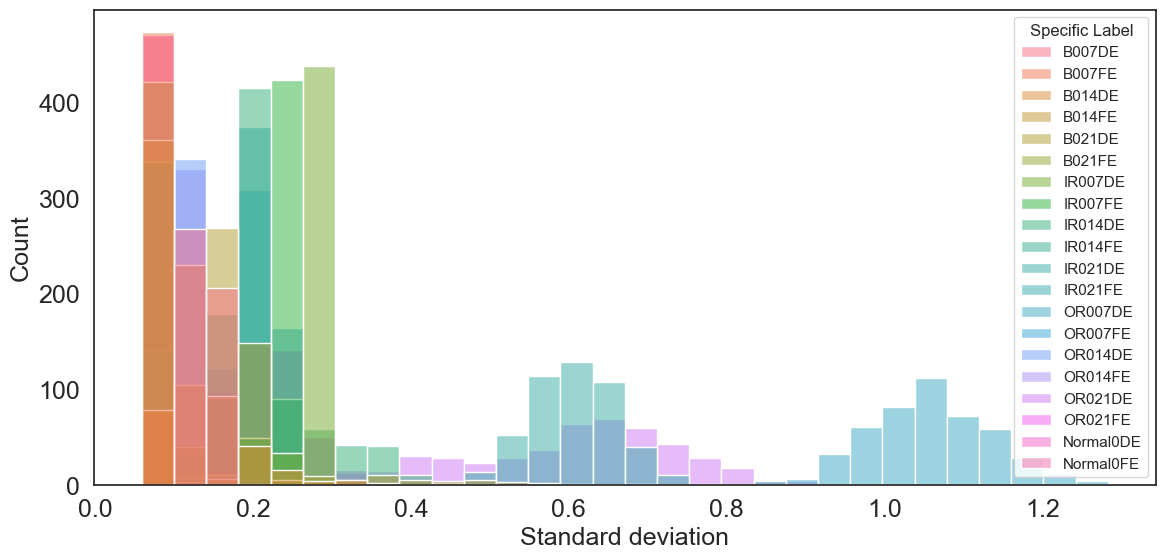

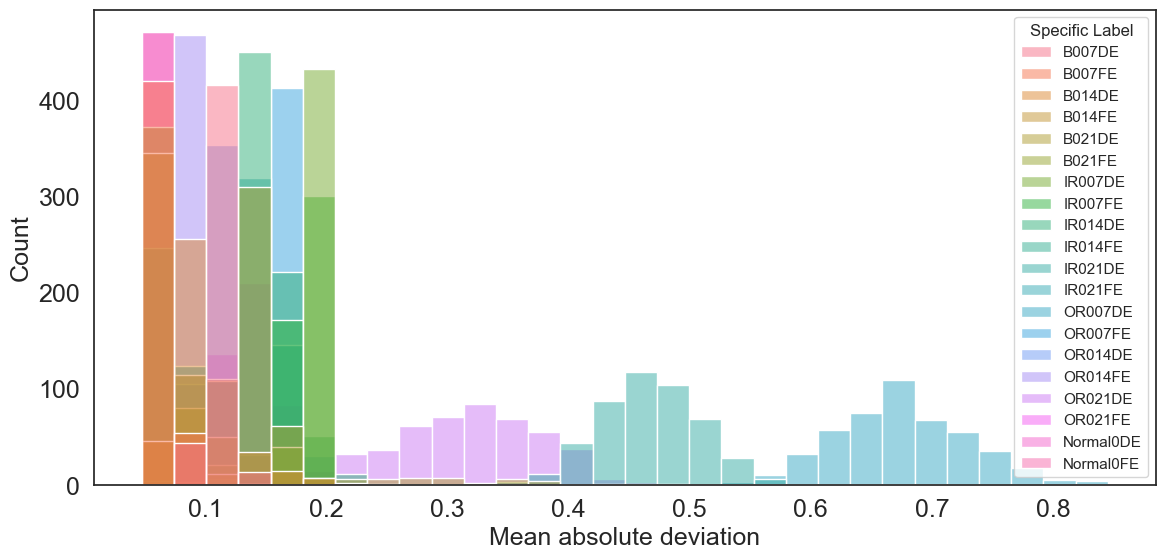

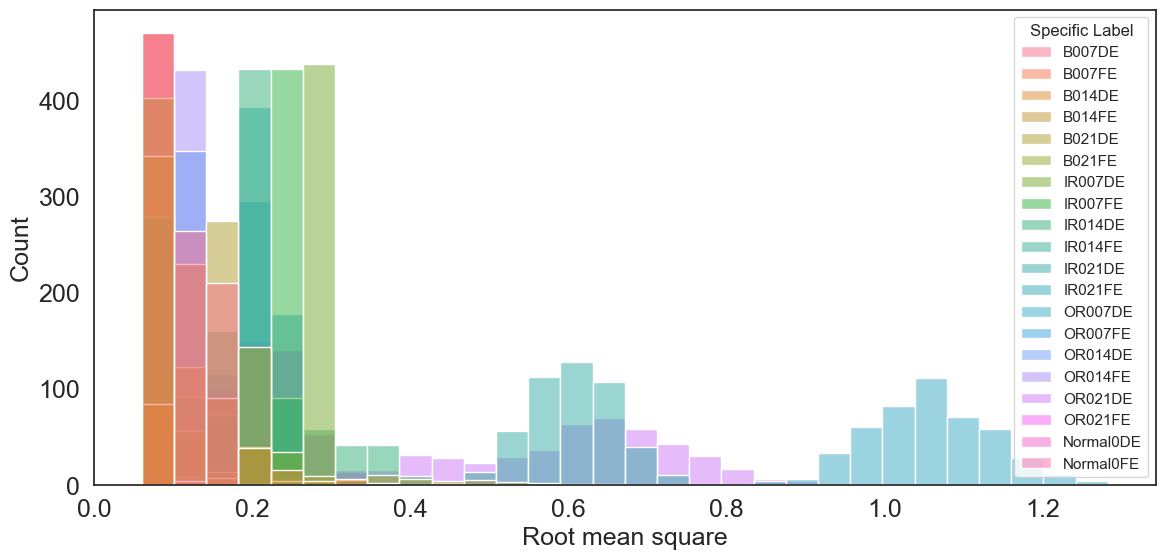

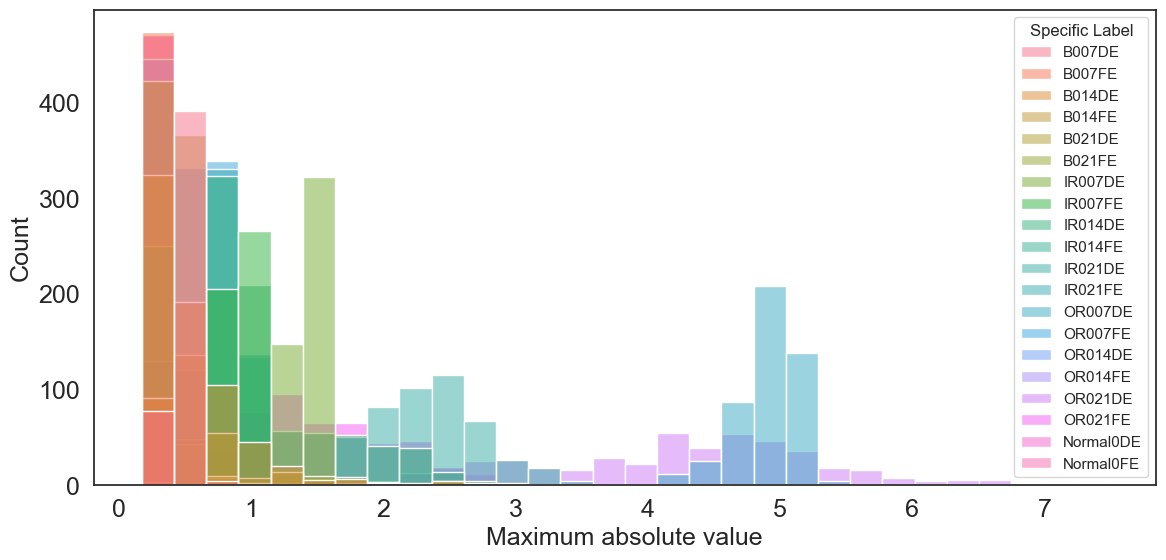

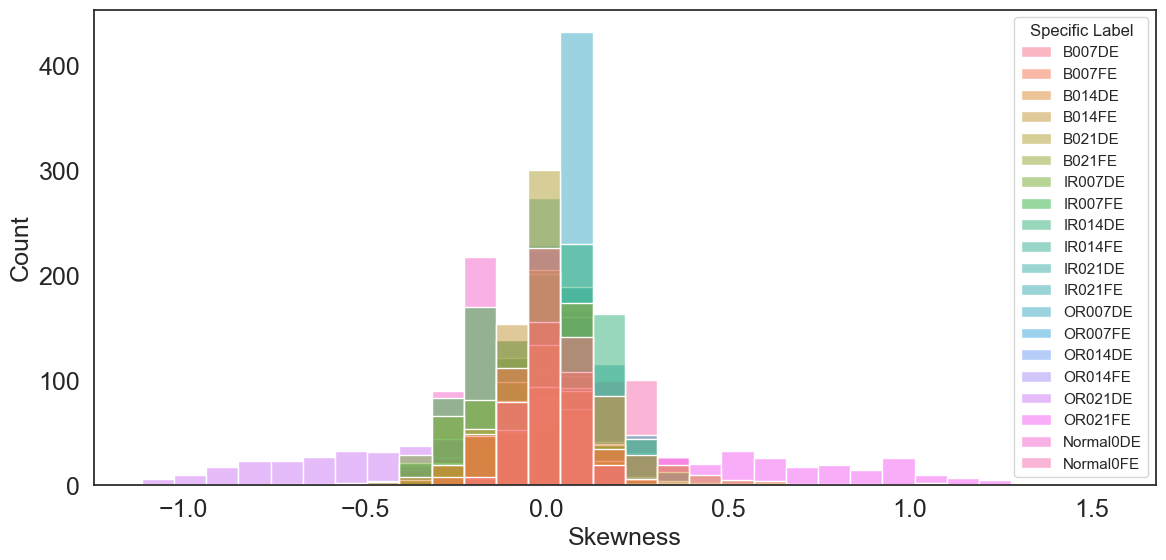

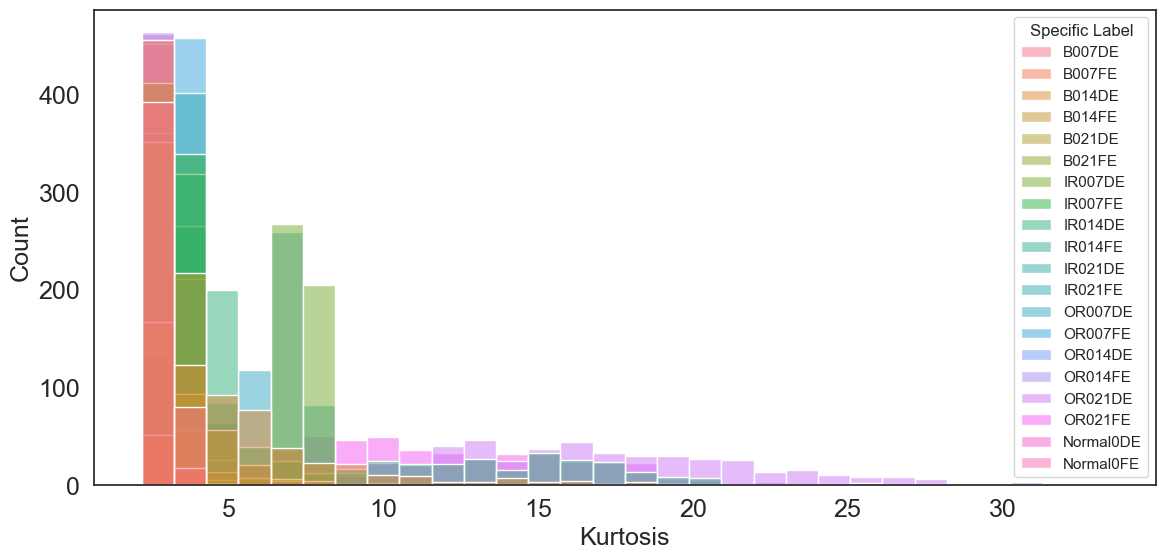

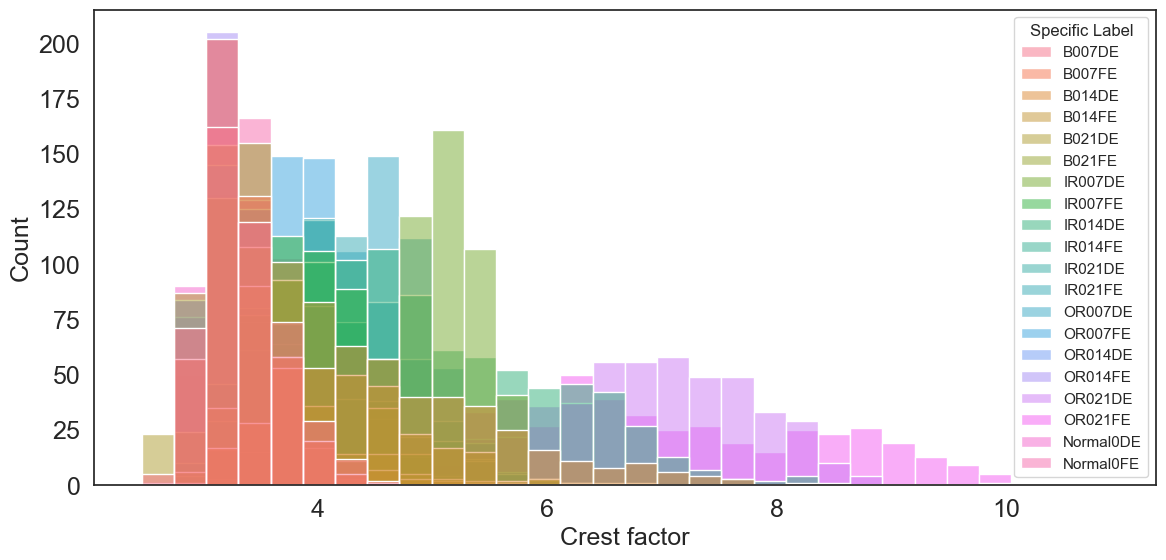

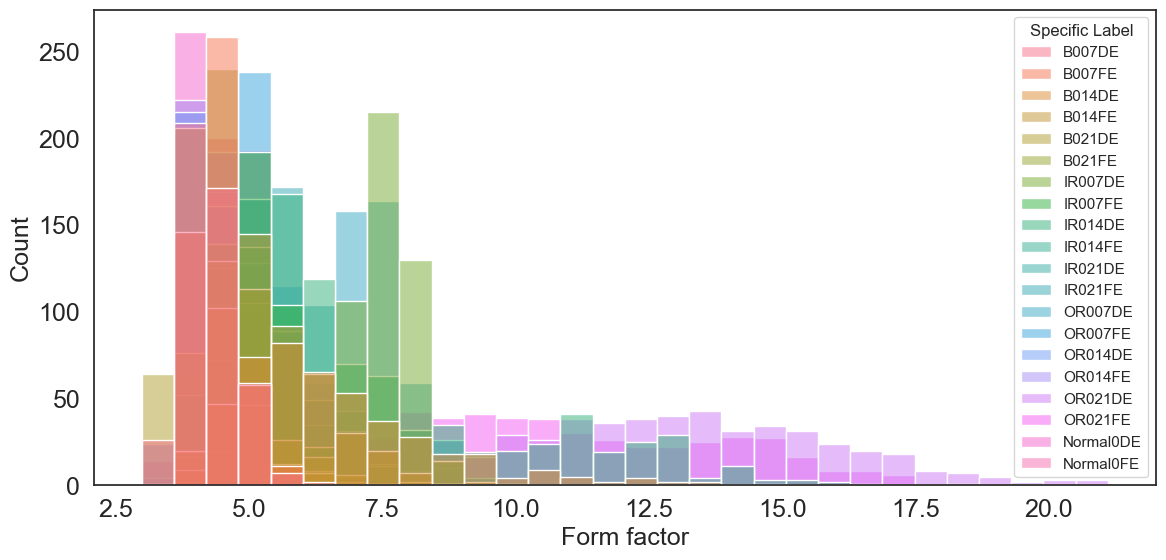

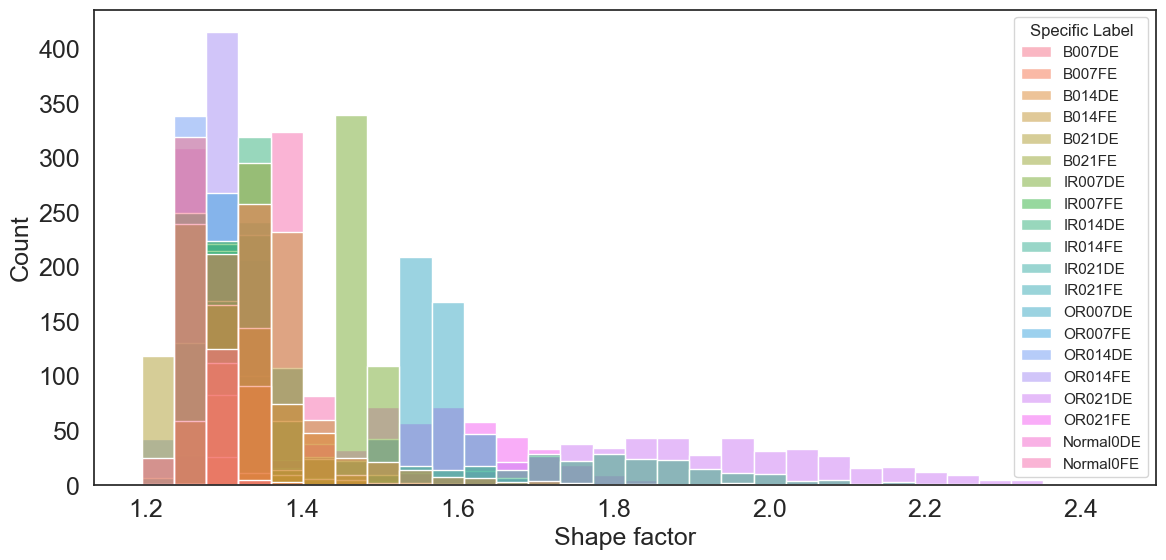

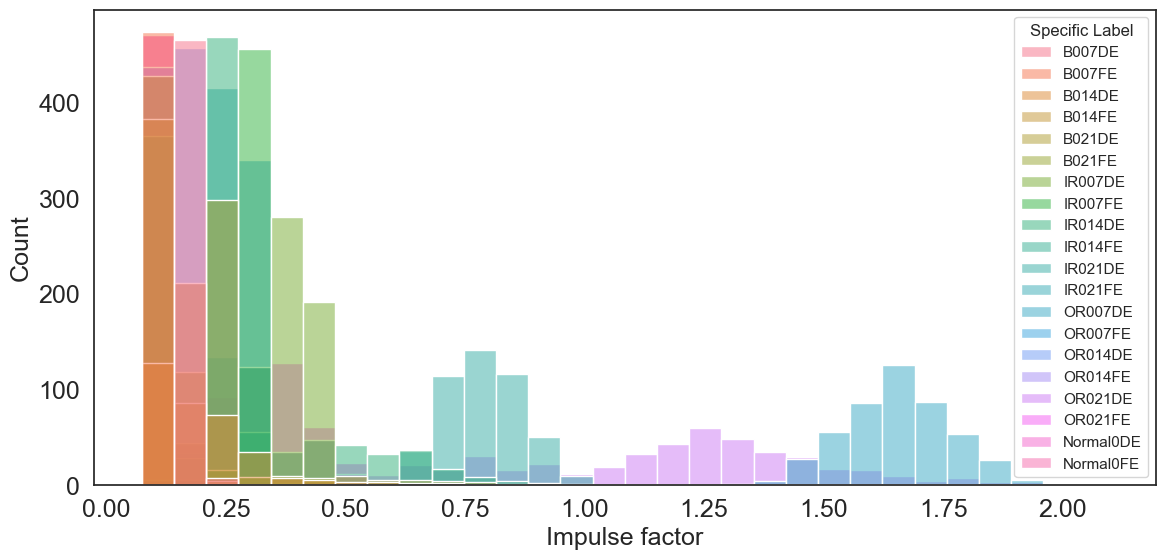

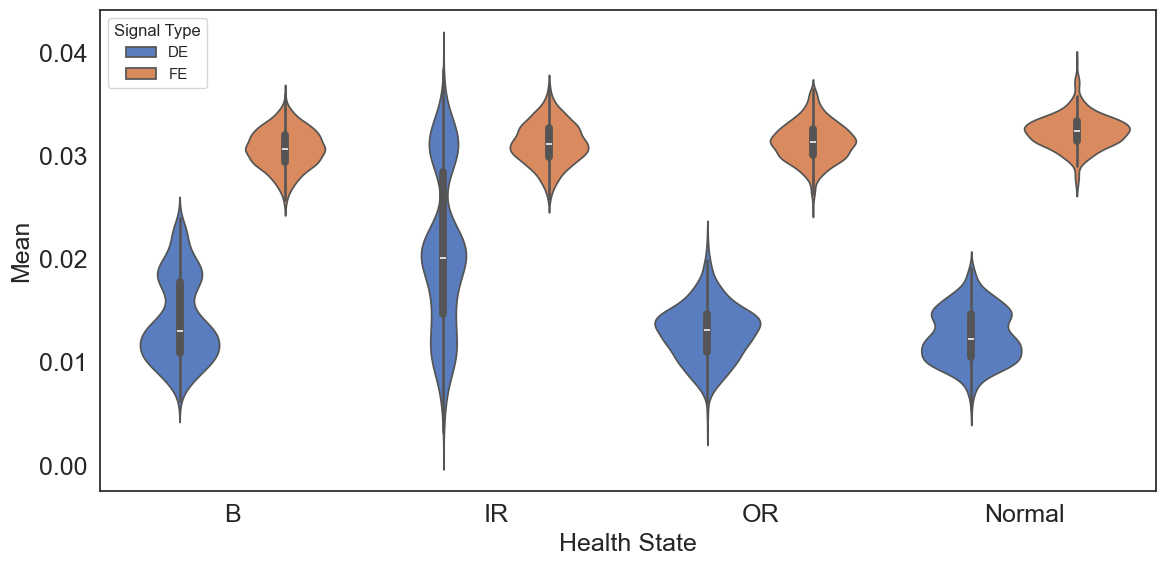

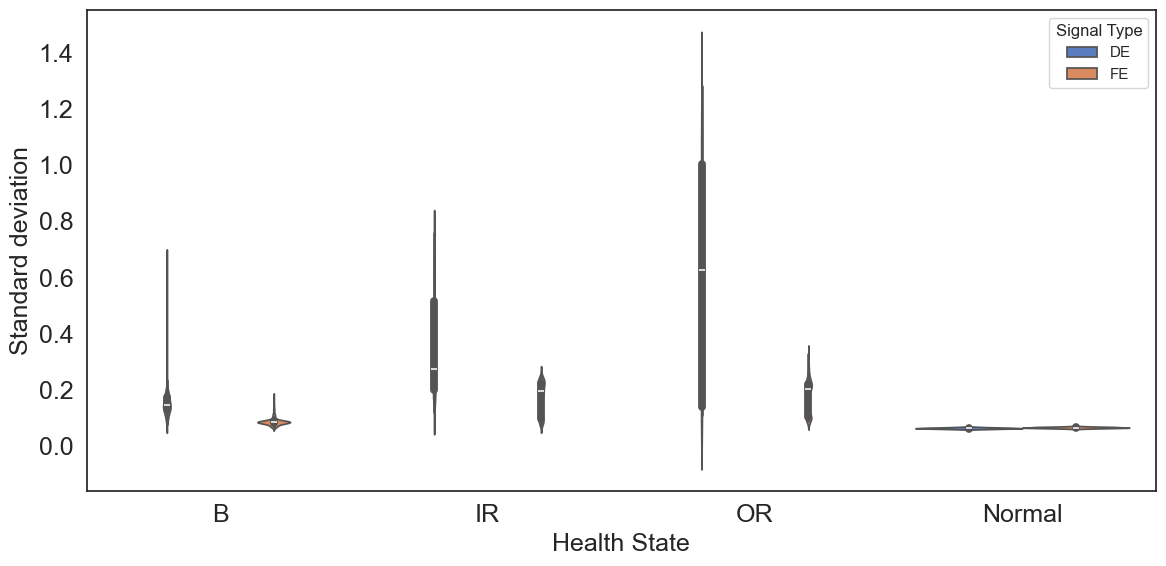

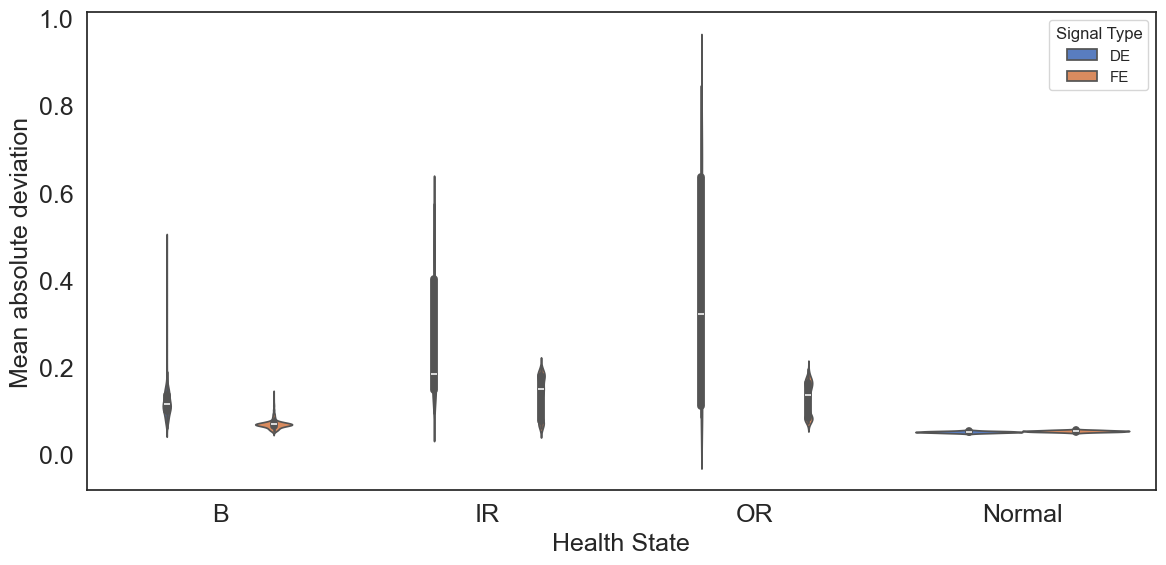

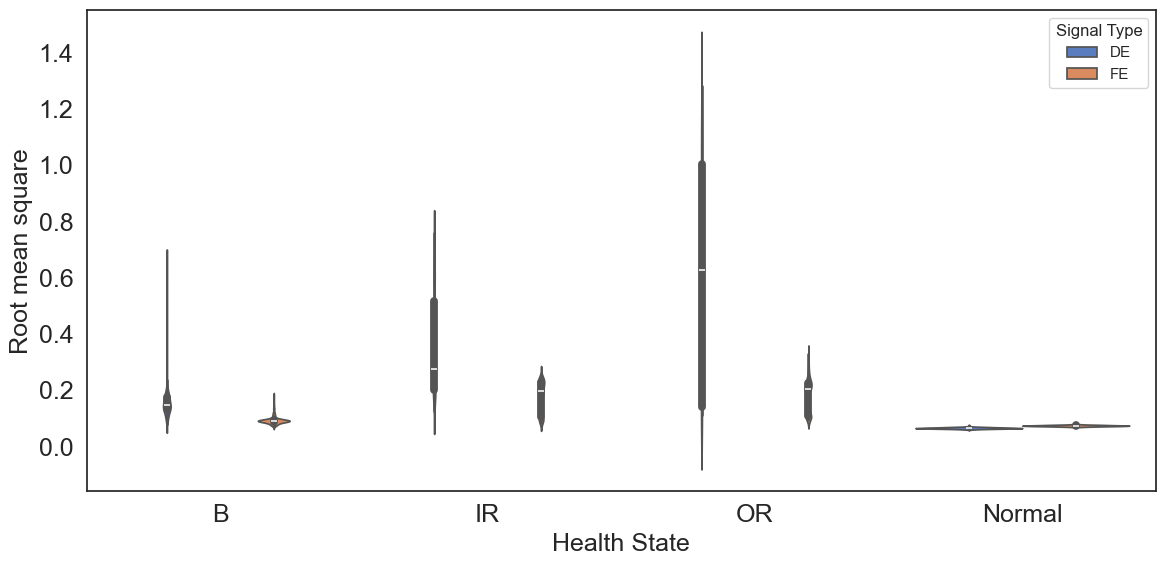

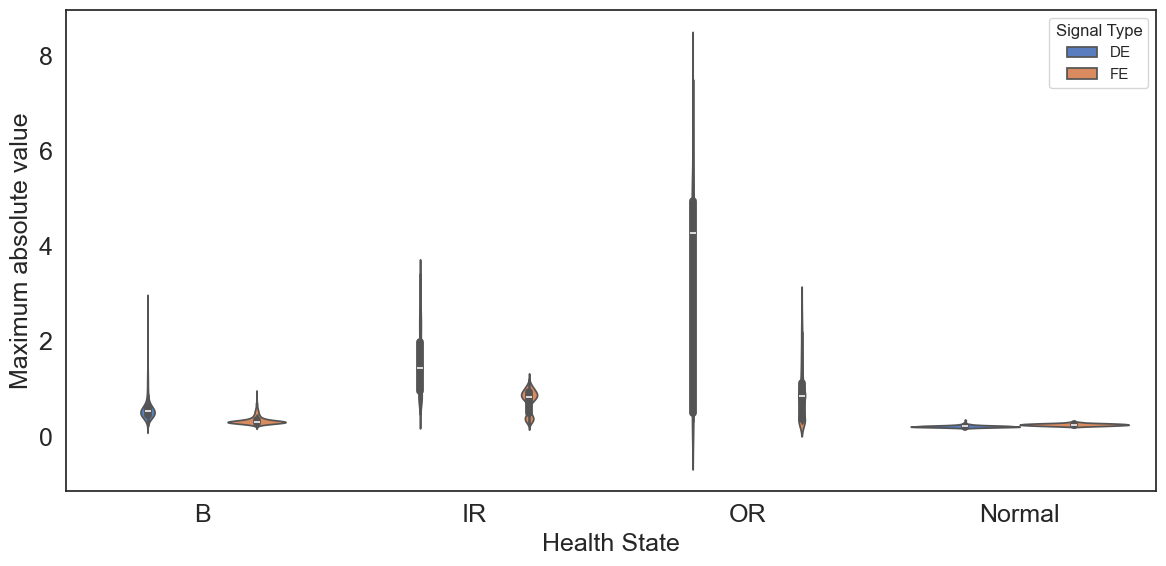

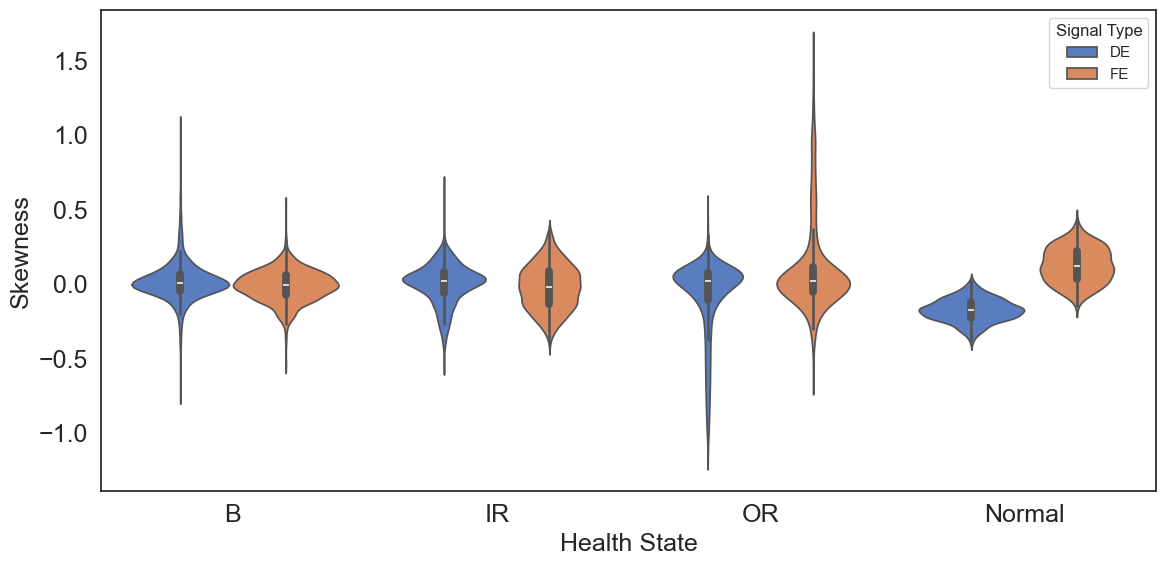

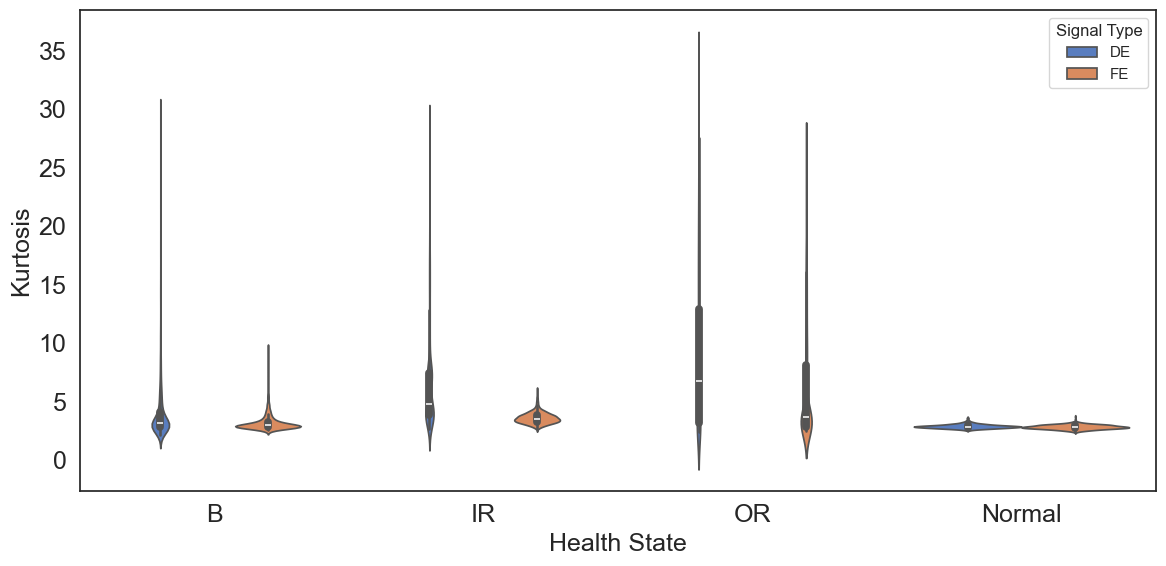

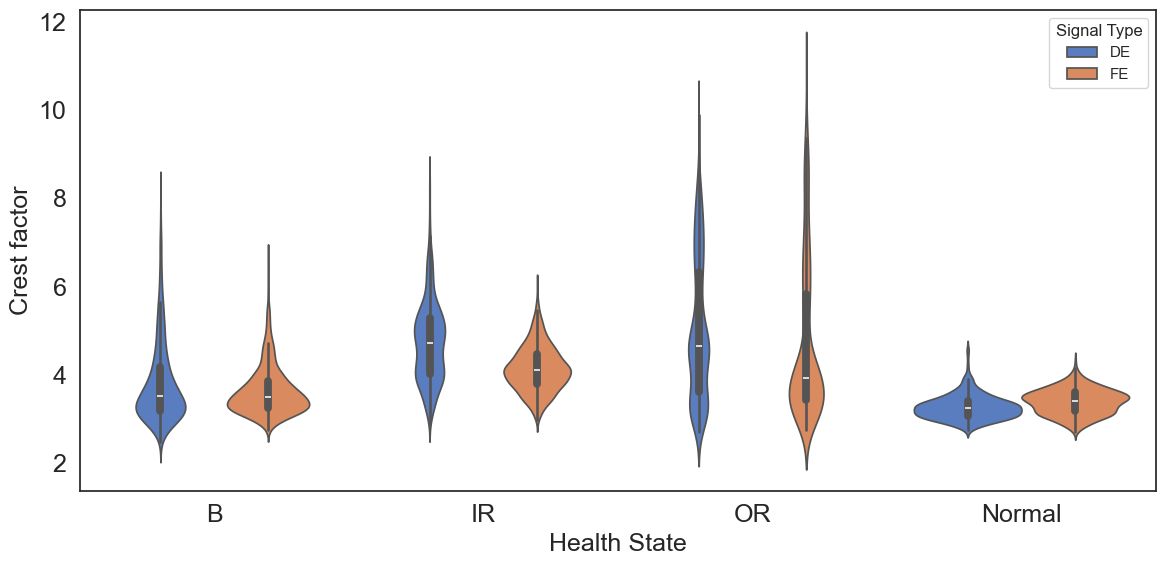

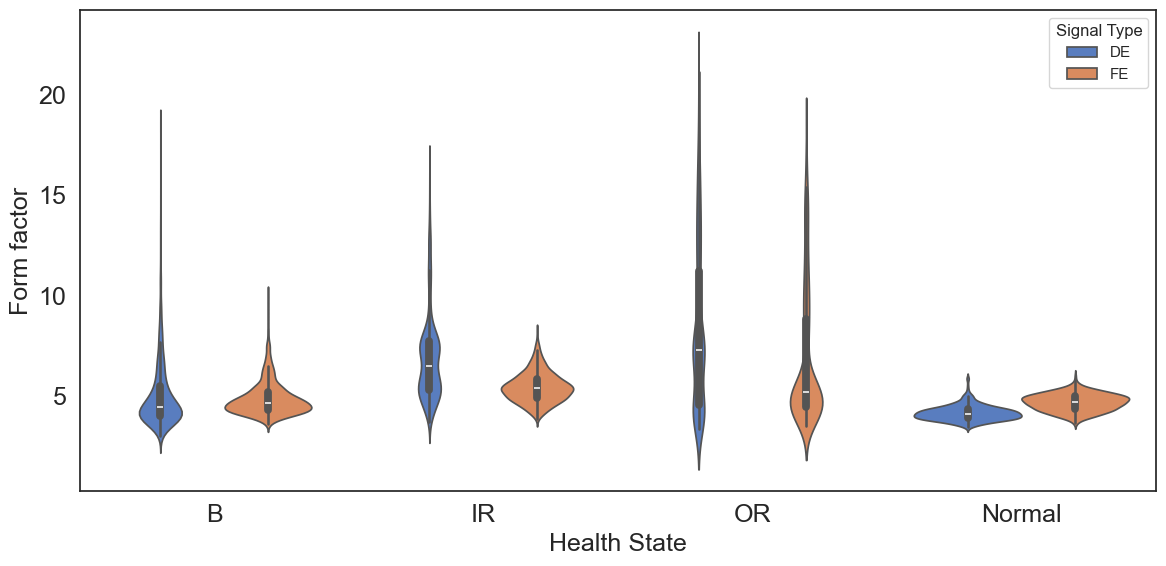

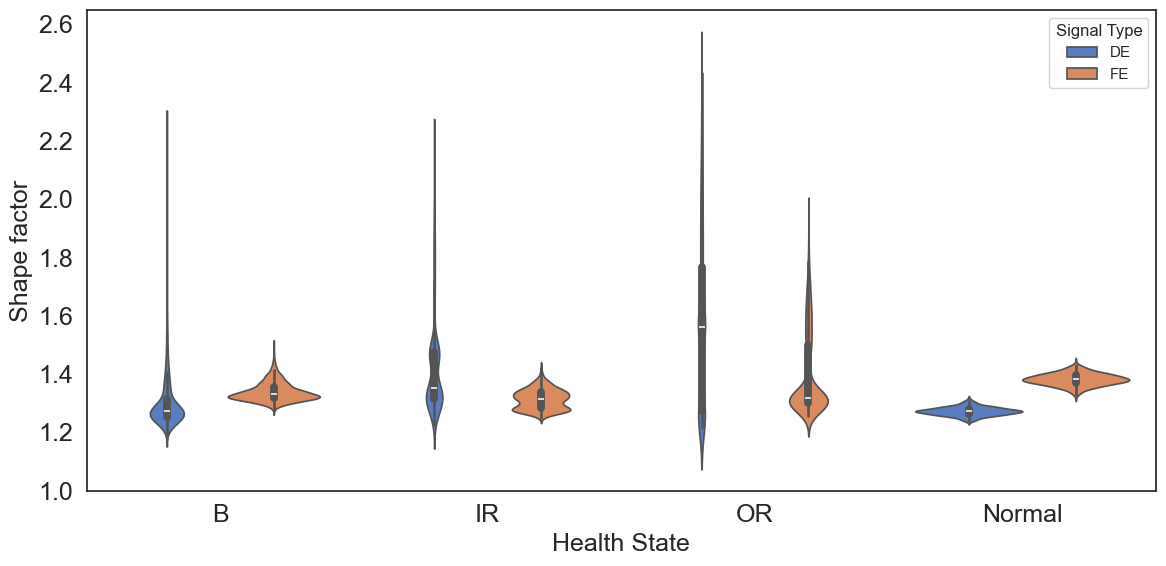

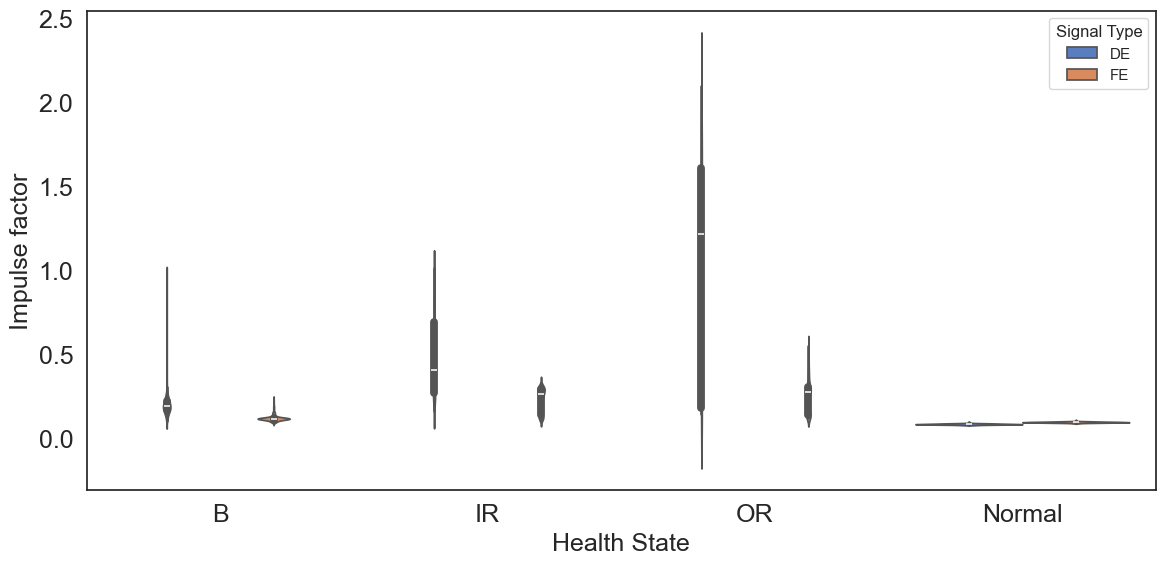

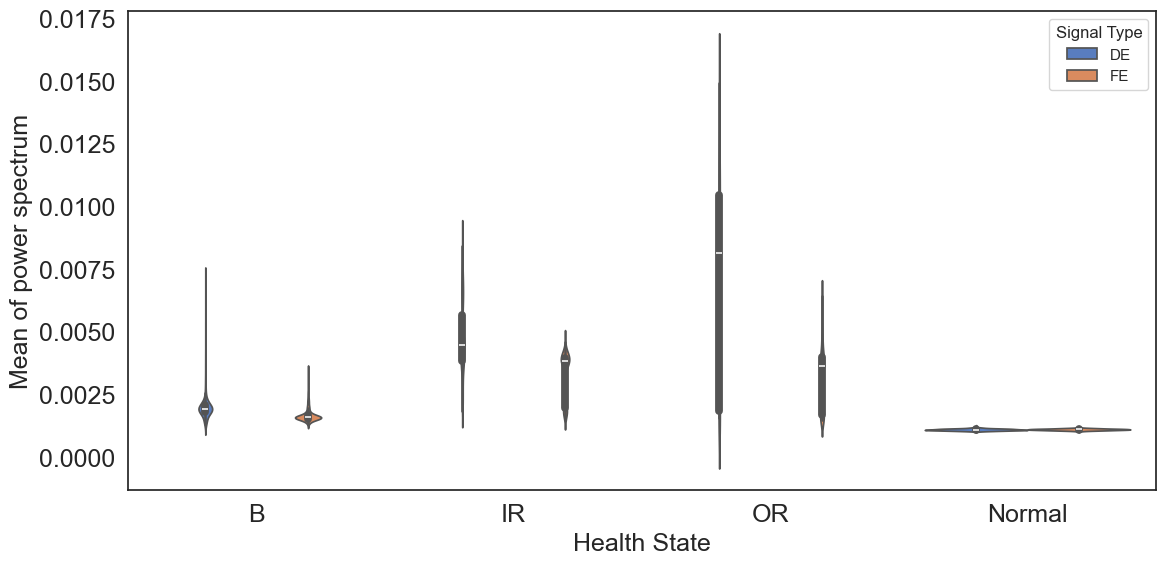

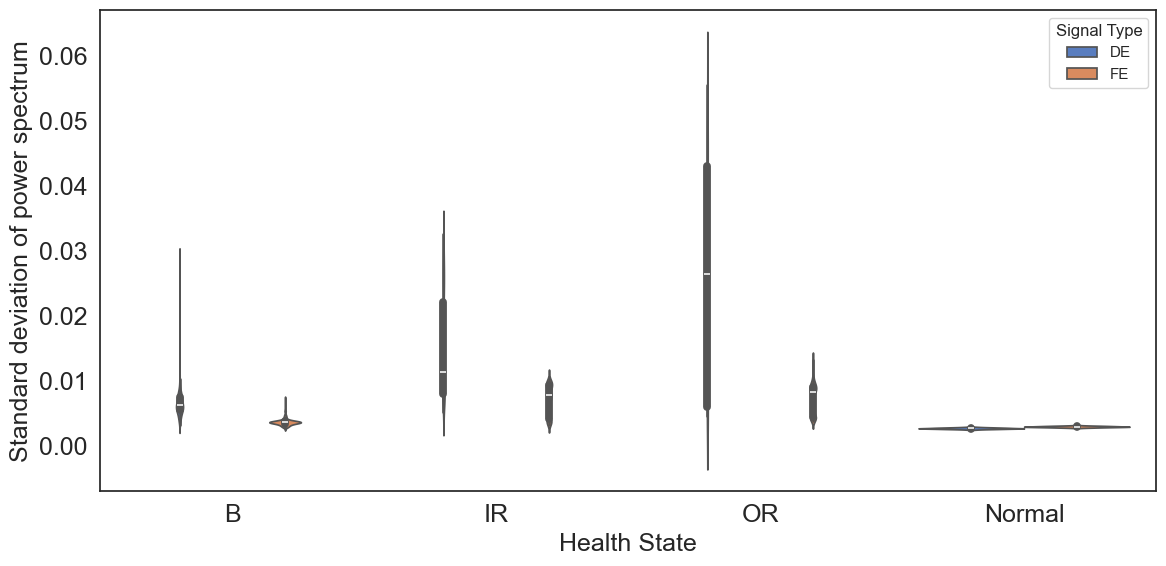

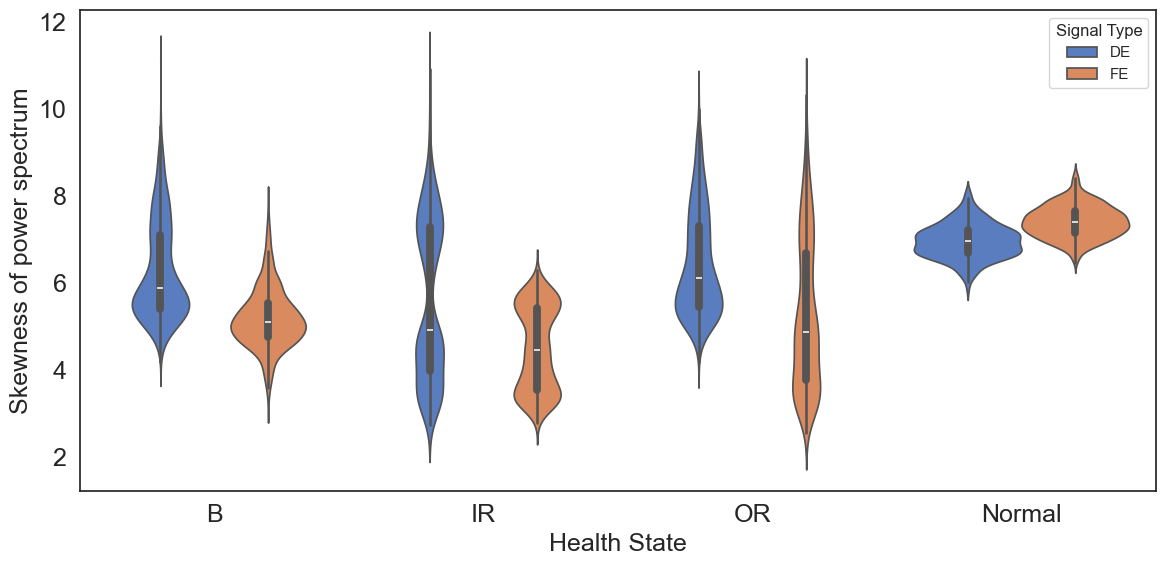

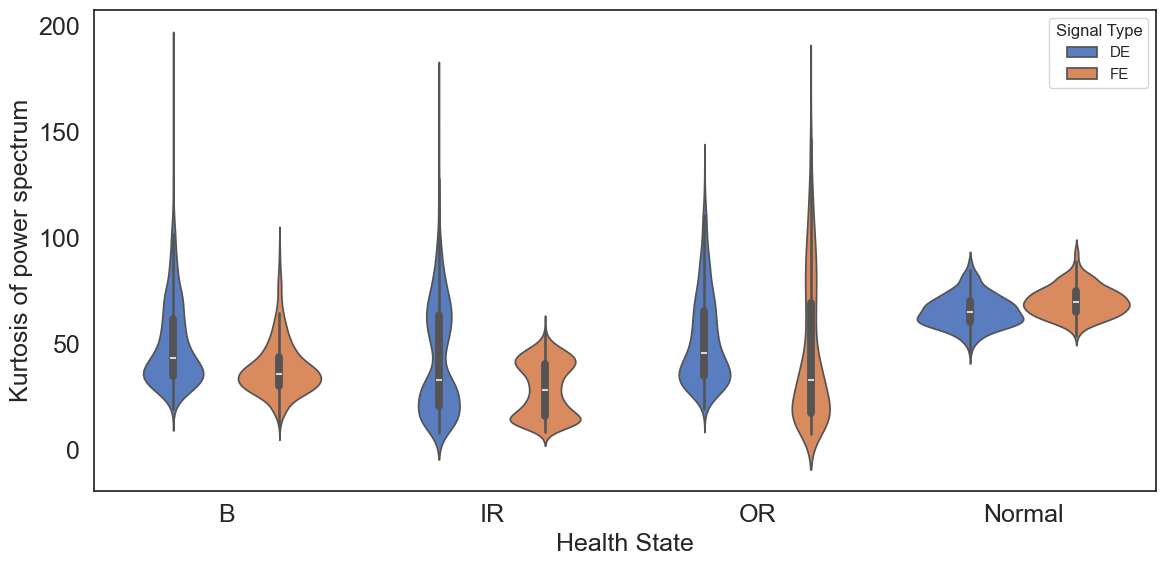

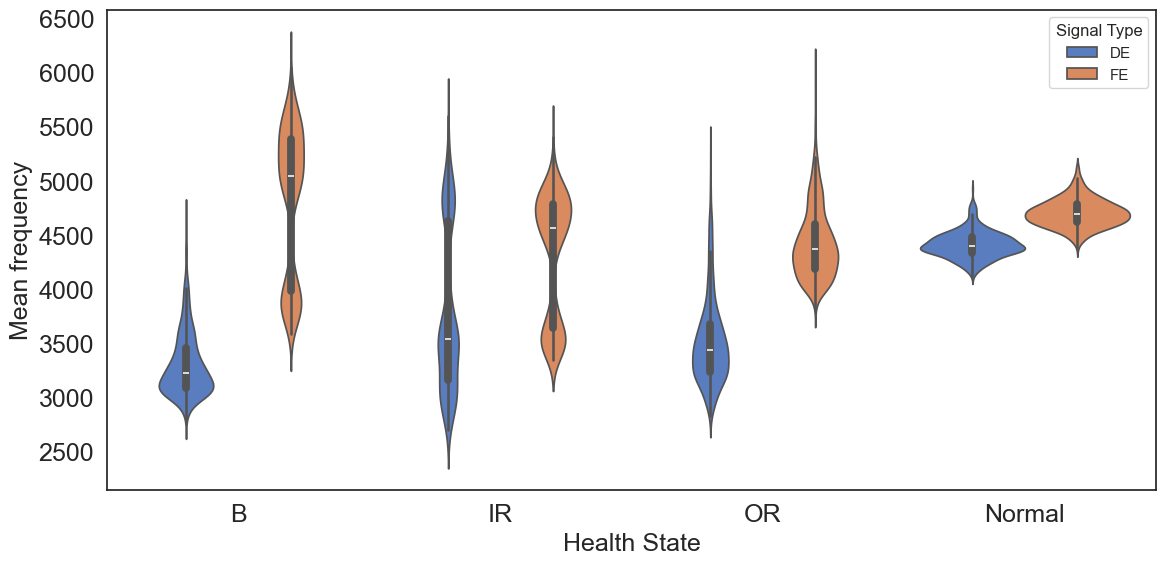

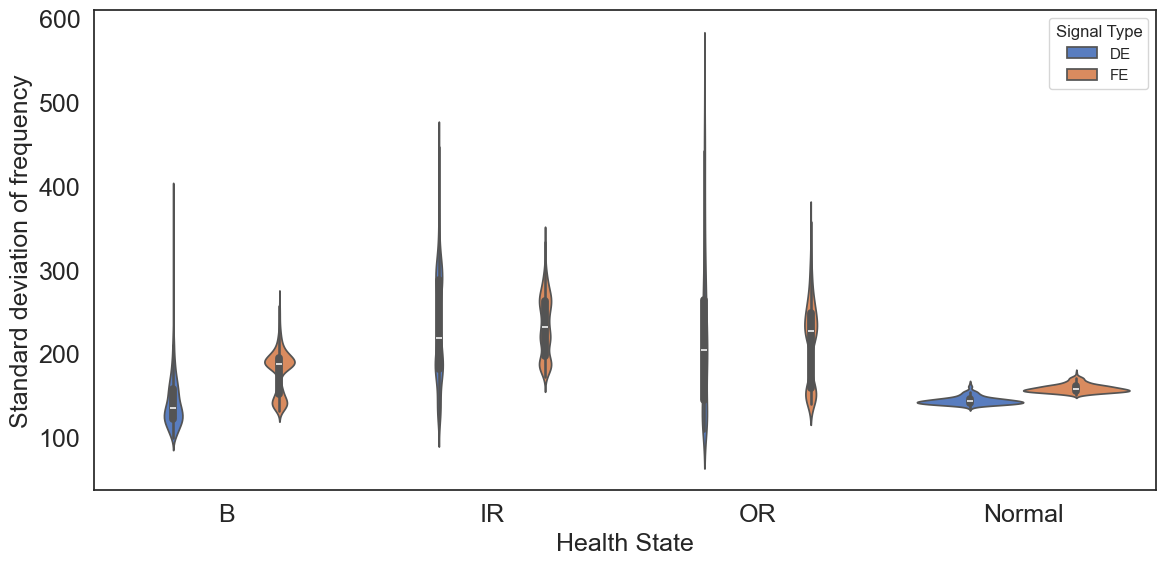

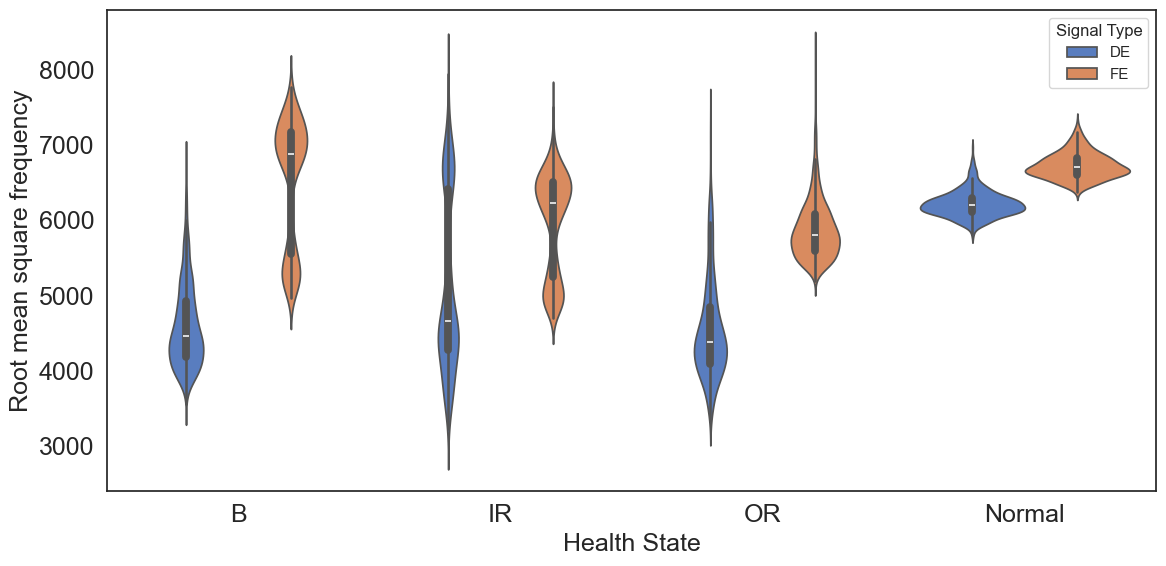

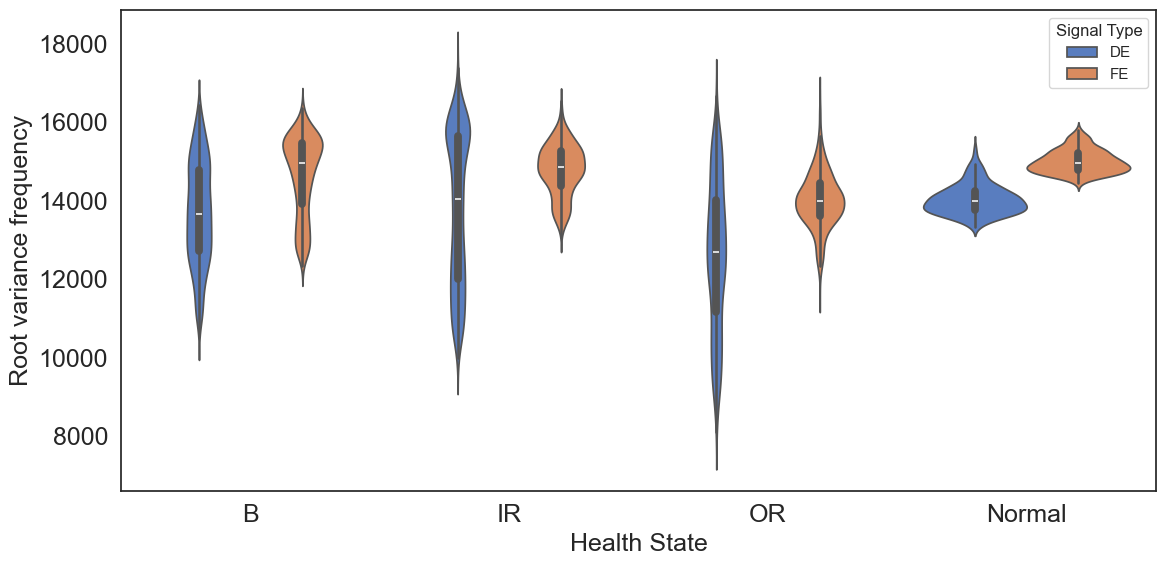

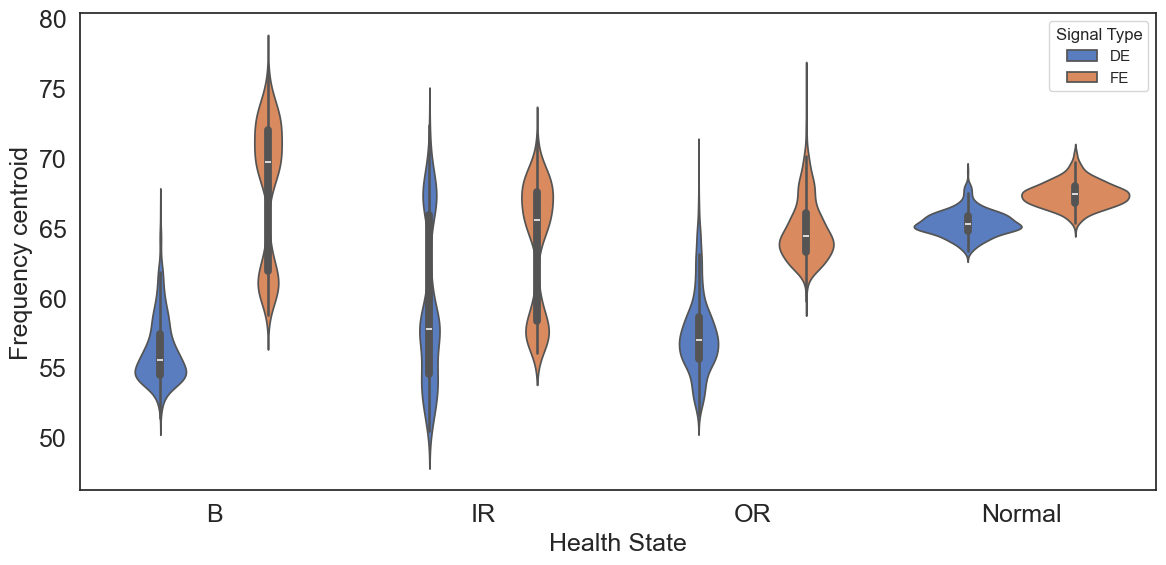

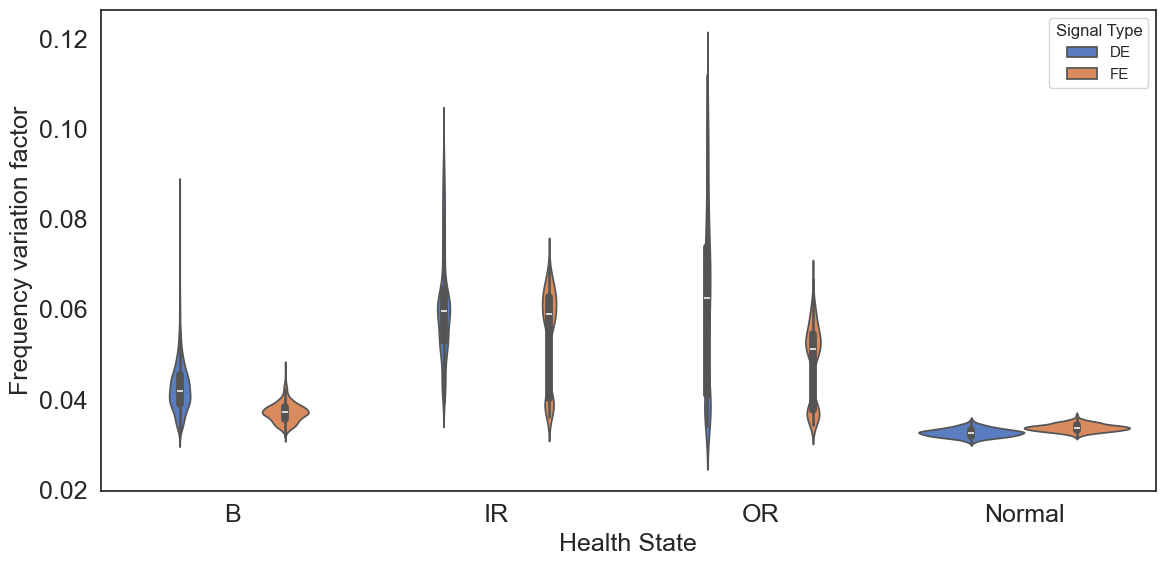

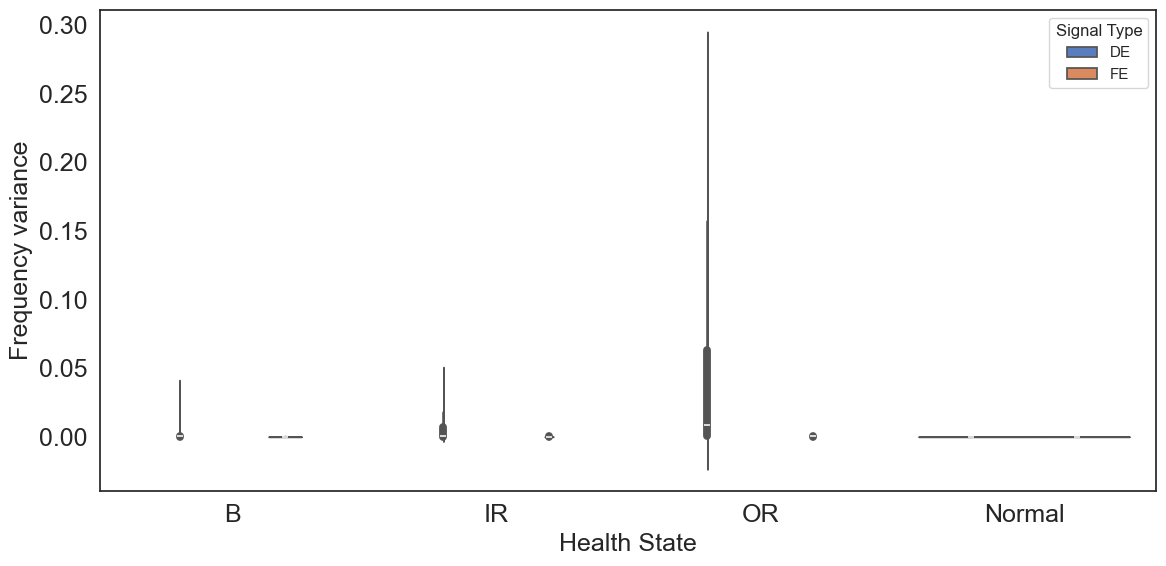

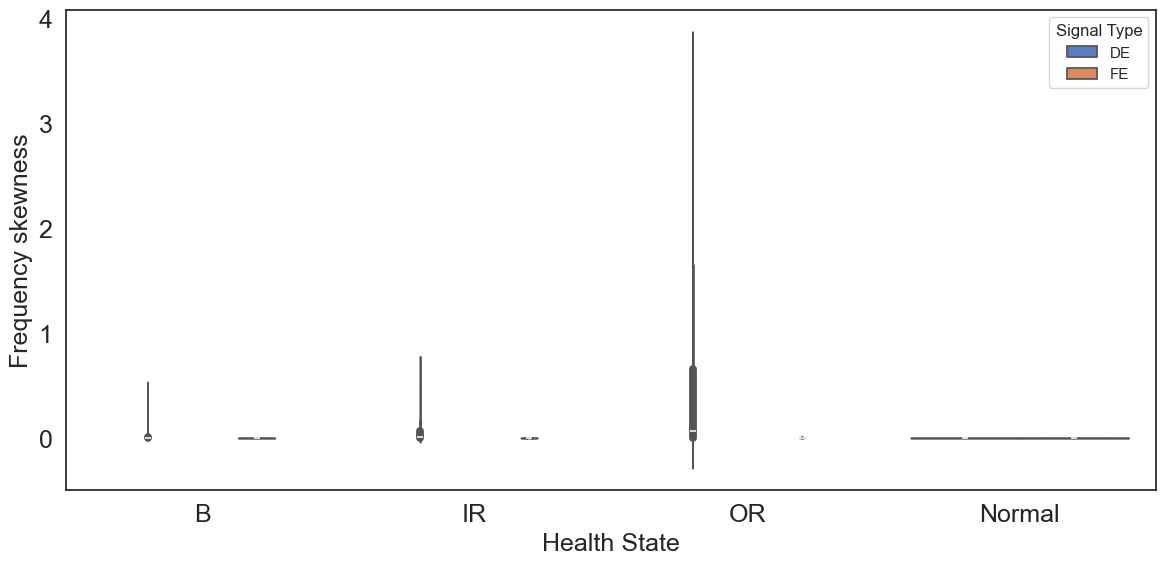

In [5]:
# Import functions from the module
from data_visualization import plot_histogram, plot_violin_plot
import matplotlib.pyplot as plt

# Define the path for the results directory
results_dir = '..\Results'

# Create the Results directory if it doesn't exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

histograms_dir = os.path.join(results_dir, 'Features_Histograms')   
violinplots_dir = os.path.join(results_dir, 'Features_Violins')

if not os.path.exists(histograms_dir):
    os.makedirs(histograms_dir)

if not os.path.exists(violinplots_dir):
    os.makedirs(violinplots_dir)

features_to_plot_hist = ['Mean', 'Standard deviation', 'Mean absolute deviation', 'Root mean square',
                    'Maximum absolute value', 'Skewness', 'Kurtosis', 'Crest factor', 'Form factor',
                    'Shape factor', 'Impulse factor']

features_to_plot_violin = features_list

for feature in features_to_plot_hist:
    plot_histogram(dataset, feature)
    plt.savefig(os.path.join(histograms_dir, f'histogram_{feature}.png'))
    plt.show()
    plt.close()

for feature in features_to_plot_violin:
    plot_violin_plot(dataset, feature)
    plt.savefig(os.path.join(violinplots_dir, f'violinplot_{feature}.png'))
    plt.show()
    plt.close()

### t-SNE Dimensionality Reduction

To visualize the high-dimensional data in a way that is easier to interpret, we utilize t-Distributed Stochastic Neighbor Embedding (t-SNE), a powerful tool for reducing the dimensionality of data while preserving the relative distances between points. This section details the process of applying t-SNE to the CWRU bearing dataset.

**Process Overview:**
1. **Feature Selection:** We select all the features extracted and listed during the dataset building process for dimensionality reduction.
2. **Standardization:** Given the variance in magnitude across different features, we standardize the features to have a mean of zero and a standard deviation of one. This normalization ensures that all features contribute equally to the analysis and improves the t-SNE outcome.
3. **t-SNE Execution:** We apply t-SNE to the standardized features, reducing the dataset to two components. This reduction allows us to plot and visually inspect the dataset in two dimensions, seeking patterns or clusters that relate to different operational conditions and health states of the bearings.
4. **Incorporation into Dataset:** The two-dimensional t-SNE results are added back into the dataset as new features (`tsne-2d-one` and `tsne-2d-two`). This enables easy plotting and further analysis in subsequent steps.

**Purpose of t-SNE Visualization:**
- **Cluster Identification:** t-SNE helps in identifying clusters in the data, which can correspond to different health states or operational conditions in the bearing data. Observing how data points cluster can guide the interpretation of the model outputs and help in diagnosing bearing conditions.
- **Outlier Detection:** By visualizing the data in two dimensions, we can easily spot anomalies or outliers which might indicate errors in data collection, unusual bearing conditions, or faults.

This visualization not only aids in understanding the data's underlying structure but also enhances our ability to communicate complex relationships and patterns in a simple and effective manner.

In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Select features from the dataset
features = dataset[features_list]  # Use feature_names obtained from build_dataset

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

# Add t-SNE results to the dataset
dataset['tsne-2d-one'] = tsne_results[:, 0]
dataset['tsne-2d-two'] = tsne_results[:, 1]

c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9736 samples in 0.002s...
[t-SNE] Computed neighbors for 9736 samples in 0.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9736
[t-SNE] Computed conditional probabilities for sample 2000 / 9736
[t-SNE] Computed conditional probabilities for sample 3000 / 9736
[t-SNE] Computed neighbors for 9736 samples in 0.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9736
[t-SNE] Computed conditional probabilities for sample 2000 / 9736
[t-SNE] Computed conditional probabilities for sample 3000 / 9736
[t-SNE] Computed conditional probabilities for sample 4000 / 9736
[t-SNE] Computed conditional probabilities for sample 5000 / 9736
[t-SNE] Computed conditional probabilities for sample 6000 / 9736
[t-SNE] Computed conditional probabilities for sample 7000 / 9736
[t-SNE] Computed conditional probabilities for sample 8000 / 9736
[t-SNE] Computed conditional probabilities for sample 9000 / 9736
[t-SNE] C

### Visualization of t-SNE Results

In this section, we visualize the results of the t-SNE dimensionality reduction using two scatter plots. The goal is to understand how the different classes are distributed in the reduced two-dimensional space.

#### t-SNE with Specific Labels

The first plot represents the data points colored according to the 'Specific Label', which combines the health state and the signal type (DE or FE). This visualization helps us identify the clusters formed by different specific labels in the t-SNE space.

- **Figure Setup**: We set the figure size to (16, 10) to ensure the plot is clear and readable.
- **Color Palette**: The "hsv" color palette is used to distinguish between the unique specific labels, ensuring each label has a distinct color.
- **Plot Details**: We add titles and labels to the axes, and adjust the font sizes for readability. The legend shows all unique specific labels with corresponding colors.

#### t-SNE with Health State and Signal Type

The second plot shows the data points colored according to the 'Health State with Signal', which provides a combination of health state and signal type. This helps visualize how the signal type influences the distribution of health states.

- **Combined Label**: We create a new column 'Health State with Signal' that combines the 'Health State' and 'Signal Type'.
- **Color Palette**: The "tab20" color palette is used to distinguish the unique health state and signal type combinations, providing a clear distinction between different categories.
- **Plot Details**: Similar to the previous plot, titles, axis labels, and legend details are included with appropriate font sizes.

These visualizations provide insights into how the data clusters in the reduced dimensional space, offering a visual understanding of the separability of different classes based on the selected features.

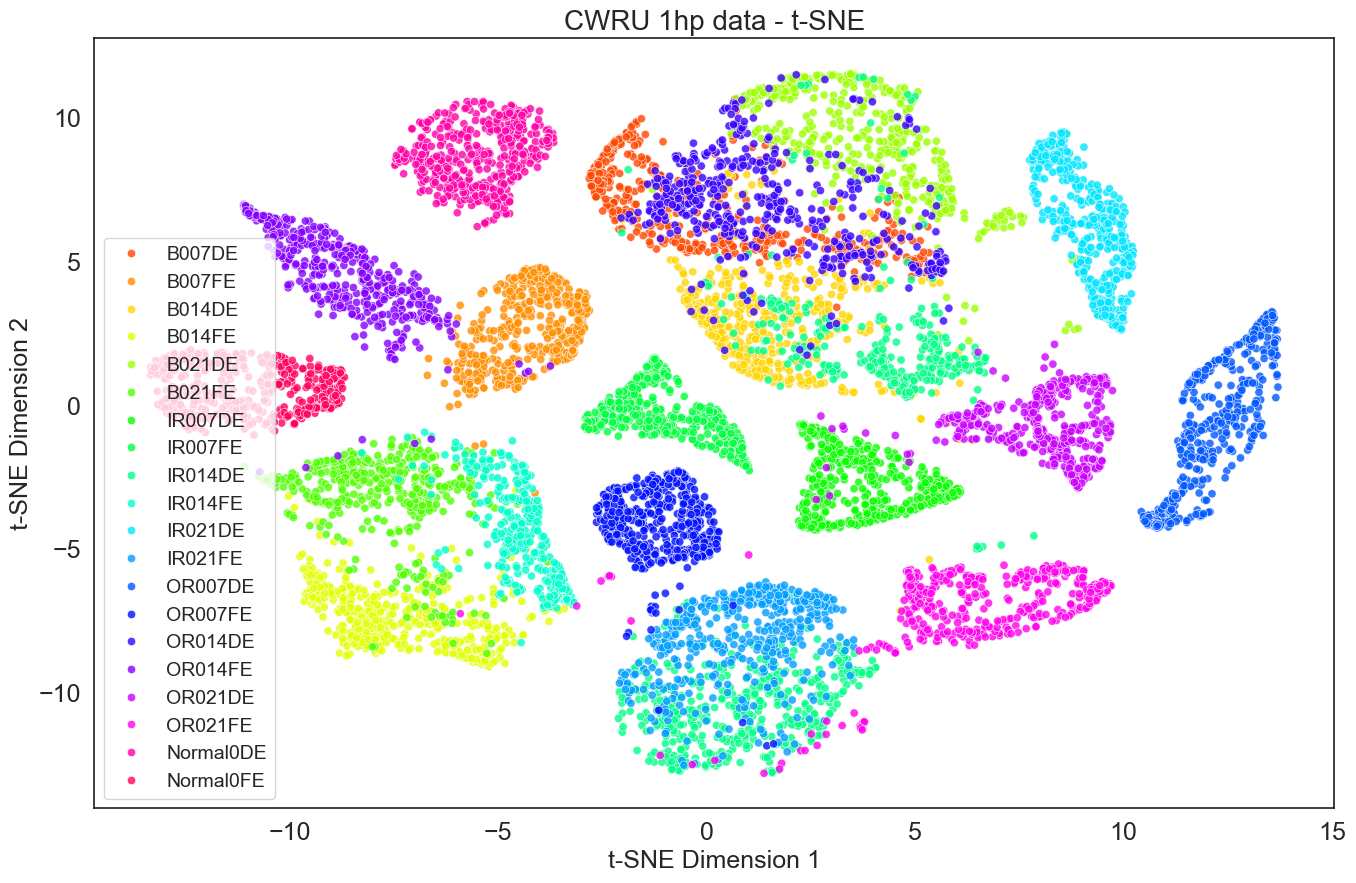

C:\Users\luigi\AppData\Local\Temp\ipykernel_32772\4015351190.py:40: UserWarning: The palette list has more values (20) than needed (8), which may not be intended.
  sns.scatterplot(


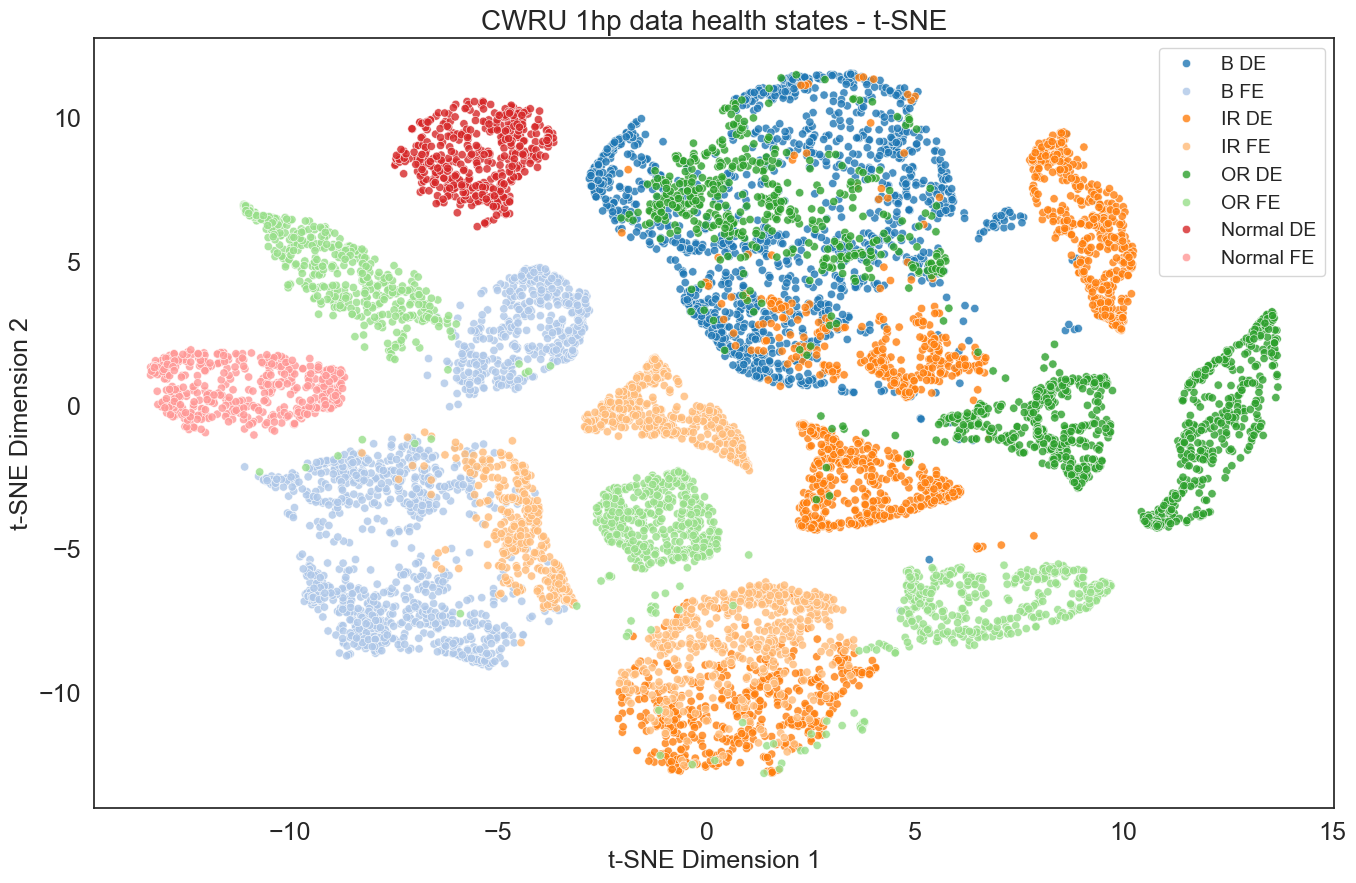

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path for the results directory
results_dir = '../Results/tSNE'

# Create the Results directory if it doesn't exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
# Plot t-SNE results with specific labels
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Specific Label',
    palette=sns.color_palette("hsv", len(dataset['Specific Label'].unique())),
    data=dataset,
    legend='full',
    alpha=0.8
)
plt.title('CWRU 1hp data - t-SNE', fontsize=20)
plt.xlabel('t-SNE Dimension 1', fontsize=18)
plt.ylabel('t-SNE Dimension 2', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14, title_fontsize=16)
plt.savefig(os.path.join(results_dir, f'tSNE_FullLabel.png'))
plt.show()
plt.close()

# Create a combined column for Health State and Signal Type
dataset['Health State with Signal'] = dataset['Health State'] + ' ' + dataset['Signal Type']

# Determine the number of unique categories for better palette selection
unique_categories = dataset['Health State with Signal'].nunique()
palette_choice = sns.color_palette("tab20")

# Plot t-SNE results with Health State and Signal Type
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Health State with Signal',
    palette=palette_choice,
    data=dataset,
    legend='full',
    alpha=0.8
)
plt.title('CWRU 1hp data health states - t-SNE', fontsize=20)
plt.xlabel('t-SNE Dimension 1', fontsize=18)
plt.ylabel('t-SNE Dimension 2', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14, title_fontsize=16)
plt.savefig(os.path.join(results_dir, f'tSNE_HealthState.png'))
plt.show()
plt.close()


### Feature Correlation Heatmap

In this section, we visualize the correlation between different features in the dataset using a heatmap. Correlation helps us understand the linear relationships between pairs of features, which can be important for feature selection and dimensionality reduction.

#### Heatmap Details

- **Correlation Matrix**: We calculate the correlation matrix using the features in `features_list`. This matrix quantifies the linear relationship between each pair of features, with values ranging from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

- **Plot Setup**: 
  - The heatmap is plotted using the `seaborn` library, which provides an intuitive and visually appealing way to represent the correlation matrix.
  - The color map `coolwarm` is used to represent the range of correlations, where warmer colors indicate positive correlations and cooler colors indicate negative correlations.

- **Annotations**: Numerical annotations are omitted for clarity. Instead, the focus is on the color gradient, which provides a quick visual assessment of the relationships.

- **Figure Size**: The figure size is set to (12, 10) to ensure the heatmap is displayed clearly and legibly.

This heatmap is a crucial step in exploratory data analysis, as it highlights potential multicollinearity issues and guides the selection of features for subsequent modeling efforts.

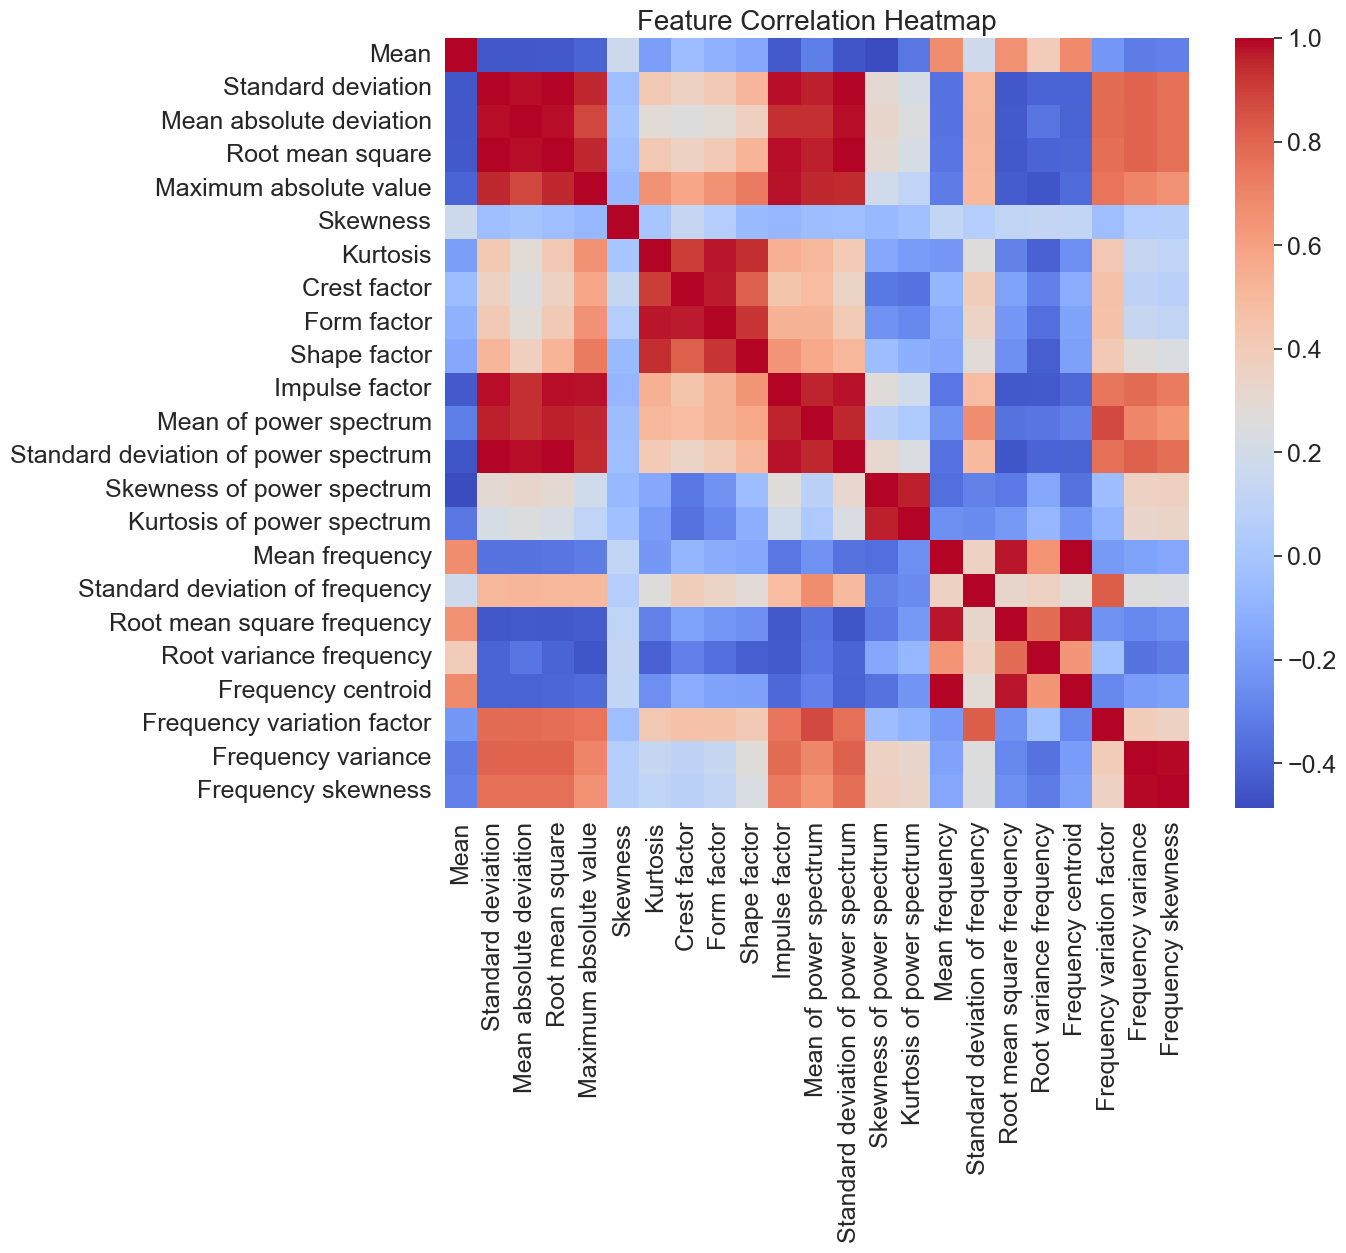

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path for the results directory
results_dir = '../Results/Correlations'

# Create the Results directory if it doesn't exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Calculate the correlation matrix
corr_matrix = dataset[features_list].corr()

# Create the heatmap without numerical annotations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.savefig(os.path.join(results_dir, 'FeatureCorrelations.png'))
plt.show()
plt.close()

### Machine Learning Pipeline with Integrated PCA

In this section, we prepare the data encoding for machine learning model evaluation. PCA for dimensionality reduction is integrated within the machine learning pipeline to ensure proper preprocessing workflow.

#### Process Overview

1. **Label Encoding**:
   - The `Health State with Signal` labels are encoded using `LabelEncoder`. This step converts categorical labels into numerical format, which is necessary for machine learning algorithms that require numerical input.

2. **Pipeline Integration**:
   - PCA and standardization are integrated within the machine learning pipeline, where PCA retains 90% of the total variance when applied.
   - This approach ensures proper preprocessing workflow during model evaluation and cross-validation.

The pipeline approach provides a streamlined workflow for feature preprocessing and dimensionality reduction, improving model performance and computational efficiency while minimizing the risk of overfitting.

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(dataset['Health State with Signal'])


### Machine Learning Model Evaluation and Hyperparameter Tuning

In this section, we focus on evaluating the performance of different machine learning models for classifying the bearing health states. We employ a Bayesian hyperparameter optimization strategy to fine-tune each model, ensuring that we achieve optimal performance.

#### Models and Hyperparameter Search

1. **Models Considered**:
   - **Support Vector Machine (SVM)**: A powerful classifier capable of handling high-dimensional spaces.
   - **k-Nearest Neighbors (kNN)**: A simple yet effective algorithm based on proximity to training examples.
   - **XGBoost**: An efficient and scalable implementation of gradient boosting that is well-suited for structured data.

2. **Bayesian Hyperparameter Optimization**:
   - We use `BayesSearchCV` from the `skopt` library to perform hyperparameter optimization.
   - For each model, we define a search space of hyperparameters and execute 50 iterations of the search process.
   - The scoring metric used for optimization is accuracy.

3. **Scoring Metrics**:
   - We evaluate models using several metrics calculated through cross-validation:
     - **Accuracy**: The fraction of correctly classified instances.
     - **Precision (Micro-averaged)**: The fraction of relevant instances among the retrieved instances.
     - **Recall (Micro-averaged)**: The fraction of relevant instances that were retrieved.
     - **F1 Score (Micro-averaged)**: The harmonic mean of precision and recall, providing a balance between them.

4. **Evaluation Process**:
   - We assess each model's performance both with and without Principal Component Analysis (PCA).
   - For each configuration, we calculate the mean and standard deviation for each scoring metric using cross-validation.
   - Results are compiled into a comprehensive table for comparison.

5. **Results Storage**:
   - The final results table is saved as a CSV file for further analysis and reporting. The results include the average scores and standard deviations for accuracy, precision, recall, and F1 score, categorized by model and feature set (with or without PCA).

This analysis provides a thorough comparison of different machine learning models and feature sets, highlighting the impact of dimensionality reduction through PCA on classification performance.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define models and parameters for Bayesian search
models = {
    'SVM': SVC(),
    'kNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
}

params = {
    'SVM': {'classifier__C': (0.1, 100, 'log-uniform'), 'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'kNN': {'classifier__n_neighbors': (1, 20), 'classifier__metric': ['euclidean', 'manhattan']},
    'XGBoost': {'classifier__max_depth': (3, 10), 'classifier__learning_rate': (0.01, 0.2, 'log-uniform'), 'classifier__n_estimators': (50, 300)},
}

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score), 
    'precision_micro': make_scorer(precision_score, average='micro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'f1_micro': make_scorer(f1_score, average='micro')
}

# Function to evaluate model
def evaluate_model(name, model, features, labels, use_pca=False):
    steps = [('scaler', StandardScaler())]
    if use_pca:
        steps.append(('pca', PCA(n_components=0.9)))
    steps.append(('classifier', model))
    
    pipeline = Pipeline(steps)
    
    optimizer = BayesSearchCV(pipeline, params[name], n_iter=50, scoring='accuracy', cv=5, random_state=0)
    optimizer.fit(features, labels)
    best_params = optimizer.best_params_
    best_score = optimizer.best_score_
    
    # Get scores for all metrics using cross_val_score
    mean_acc = cross_val_score(optimizer.best_estimator_, features, labels, scoring='accuracy', cv=5).mean()
    std_acc = cross_val_score(optimizer.best_estimator_, features, labels, scoring='accuracy', cv=5).std()
    mean_precision = cross_val_score(optimizer.best_estimator_, features, labels, scoring='precision_micro', cv=5).mean()
    std_precision = cross_val_score(optimizer.best_estimator_, features, labels, scoring='precision_micro', cv=5).std()
    mean_recall = cross_val_score(optimizer.best_estimator_, features, labels, scoring='recall_micro', cv=5).mean()
    std_recall = cross_val_score(optimizer.best_estimator_, features, labels, scoring='recall_micro', cv=5).std()
    mean_f1 = cross_val_score(optimizer.best_estimator_, features, labels, scoring='f1_micro', cv=5).mean()
    std_f1 = cross_val_score(optimizer.best_estimator_, features, labels, scoring='f1_micro', cv=5).std()

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best CV score for {name} (Accuracy): {best_score:.4f}")
    return (mean_acc, std_acc, mean_precision, std_precision, mean_recall, std_recall, mean_f1, std_f1)

# Prepare a list to collect results
results_list = []

# Evaluate each model with and without PCA
for name, model in models.items():
    print(f"Evaluating {name} without PCA...")
    results_without_pca = evaluate_model(name, model, dataset[features_list], encoded_labels, use_pca=False)
    results_list.append({'Model': name, 'Feature Set': 'Without PCA', 
                         'Accuracy': results_without_pca[0], 'Acc Std': results_without_pca[1],
                         'Precision': results_without_pca[2], 'Prec Std': results_without_pca[3],
                         'Recall': results_without_pca[4], 'Recall Std': results_without_pca[5],
                         'F1 Score': results_without_pca[6], 'F1 Std': results_without_pca[7]})
    
    print(f"Evaluating {name} with PCA...")
    results_with_pca = evaluate_model(name, model, dataset[features_list], encoded_labels, use_pca=True)
    results_list.append({'Model': name, 'Feature Set': 'With PCA', 
                         'Accuracy': results_with_pca[0], 'Acc Std': results_with_pca[1],
                         'Precision': results_with_pca[2], 'Prec Std': results_with_pca[3],
                         'Recall': results_with_pca[4], 'Recall Std': results_with_pca[5],
                         'F1 Score': results_with_pca[6], 'F1 Std': results_with_pca[7]})

# Convert the list to a DataFrame
results_table = pd.DataFrame(results_list)

# Save the results table to a CSV file
results_csv_path = '../data/results_table.csv'
results_table.to_csv(results_csv_path, index=False)


Evaluating SVM without PCA...


c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('rbf')] before, using random point [4.415945884545842, 'linear']
  warnings.warn(


Best parameters for SVM: OrderedDict([('classifier__C', 99.99931817790345), ('classifier__kernel', 'rbf')])
Best CV score for SVM (Accuracy): 0.9540
Evaluating SVM with PCA...
Best parameters for SVM: OrderedDict([('classifier__C', 100.0), ('classifier__kernel', 'rbf')])
Best CV score for SVM (Accuracy): 0.8672
Evaluating kNN without PCA...
Best parameters for SVM: OrderedDict([('classifier__C', 100.0), ('classifier__kernel', 'rbf')])
Best CV score for SVM (Accuracy): 0.8672
Evaluating kNN without PCA...


c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1)] before, using random point ['manhattan', np.int64(2)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1)] before, using random point ['euclidean', np.int64(7)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1)] before, using random point ['euclidean', np.int64(7)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing

Best parameters for kNN: OrderedDict([('classifier__metric', 'manhattan'), ('classifier__n_neighbors', 3)])
Best CV score for kNN (Accuracy): 0.9234
Evaluating kNN with PCA...


c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(1)] before, using random point ['manhattan', np.int64(7)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(3)] before, using random point ['euclidean', np.int64(7)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing-fault-classification-ML\venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(3)] before, using random point ['euclidean', np.int64(7)]
  warnings.warn(
c:\Users\luigi\OneDrive - Politecnico di Torino\Github\CWRU-bearing

Best parameters for kNN: OrderedDict([('classifier__metric', 'euclidean'), ('classifier__n_neighbors', 4)])
Best CV score for kNN (Accuracy): 0.8675
Evaluating XGBoost without PCA...
Best parameters for XGBoost: OrderedDict([('classifier__learning_rate', 0.1986844587381556), ('classifier__max_depth', 5), ('classifier__n_estimators', 292)])
Best CV score for XGBoost (Accuracy): 0.9398
Evaluating XGBoost with PCA...
Best parameters for XGBoost: OrderedDict([('classifier__learning_rate', 0.1986844587381556), ('classifier__max_depth', 5), ('classifier__n_estimators', 292)])
Best CV score for XGBoost (Accuracy): 0.9398
Evaluating XGBoost with PCA...
Best parameters for XGBoost: OrderedDict([('classifier__learning_rate', 0.2), ('classifier__max_depth', 7), ('classifier__n_estimators', 300)])
Best CV score for XGBoost (Accuracy): 0.8658
Best parameters for XGBoost: OrderedDict([('classifier__learning_rate', 0.2), ('classifier__max_depth', 7), ('classifier__n_estimators', 300)])
Best CV score 

### Visualization of Model Performance

In this section, we visualize the performance of different machine learning models evaluated with and without Principal Component Analysis (PCA). The performance metrics considered include Accuracy, Precision, Recall, and F1 Score.

#### Plot Configuration

- **Setup**: We use the `seaborn` and `matplotlib` libraries to create clear and informative bar plots, depicting each model's performance across the four metrics.
- **Data Source**: The results are read from the previously saved CSV file, ensuring consistency between the reported results and the visualization.

#### Metrics Plotted

- **Accuracy**: Reflects the overall correctness of the model's predictions.
- **Precision (Micro-averaged)**: Indicates the proportion of correctly predicted positive observations.
- **Recall (Micro-averaged)**: Measures the model's ability to identify all relevant instances.
- **F1 Score (Micro-averaged)**: Combines precision and recall into a single metric, emphasizing balance.

#### Plot Details

- **Subplots**: We generate a 2x2 grid of subplots, each displaying one of the metrics for all models and feature sets.
- **Error Bars**: Standard deviation values are used to depict confidence intervals for each metric, providing insight into the variability of model performance across cross-validation folds.
- **Legend**: A consolidated legend outside the plot area clarifies which feature set (with or without PCA) corresponds to each bar, enhancing the plot's readability.

#### Interpretation

This visualization allows for a straightforward comparison of the models, highlighting the impact of PCA on their performance across various metrics. It serves as a valuable tool for identifying which model and feature set combination yields the best balance between accuracy, precision, recall, and F1 score.

By visualizing these metrics, we can quickly discern patterns and differences in performance, enabling informed decisions about model selection and feature engineering in the context of bearing fault classification.

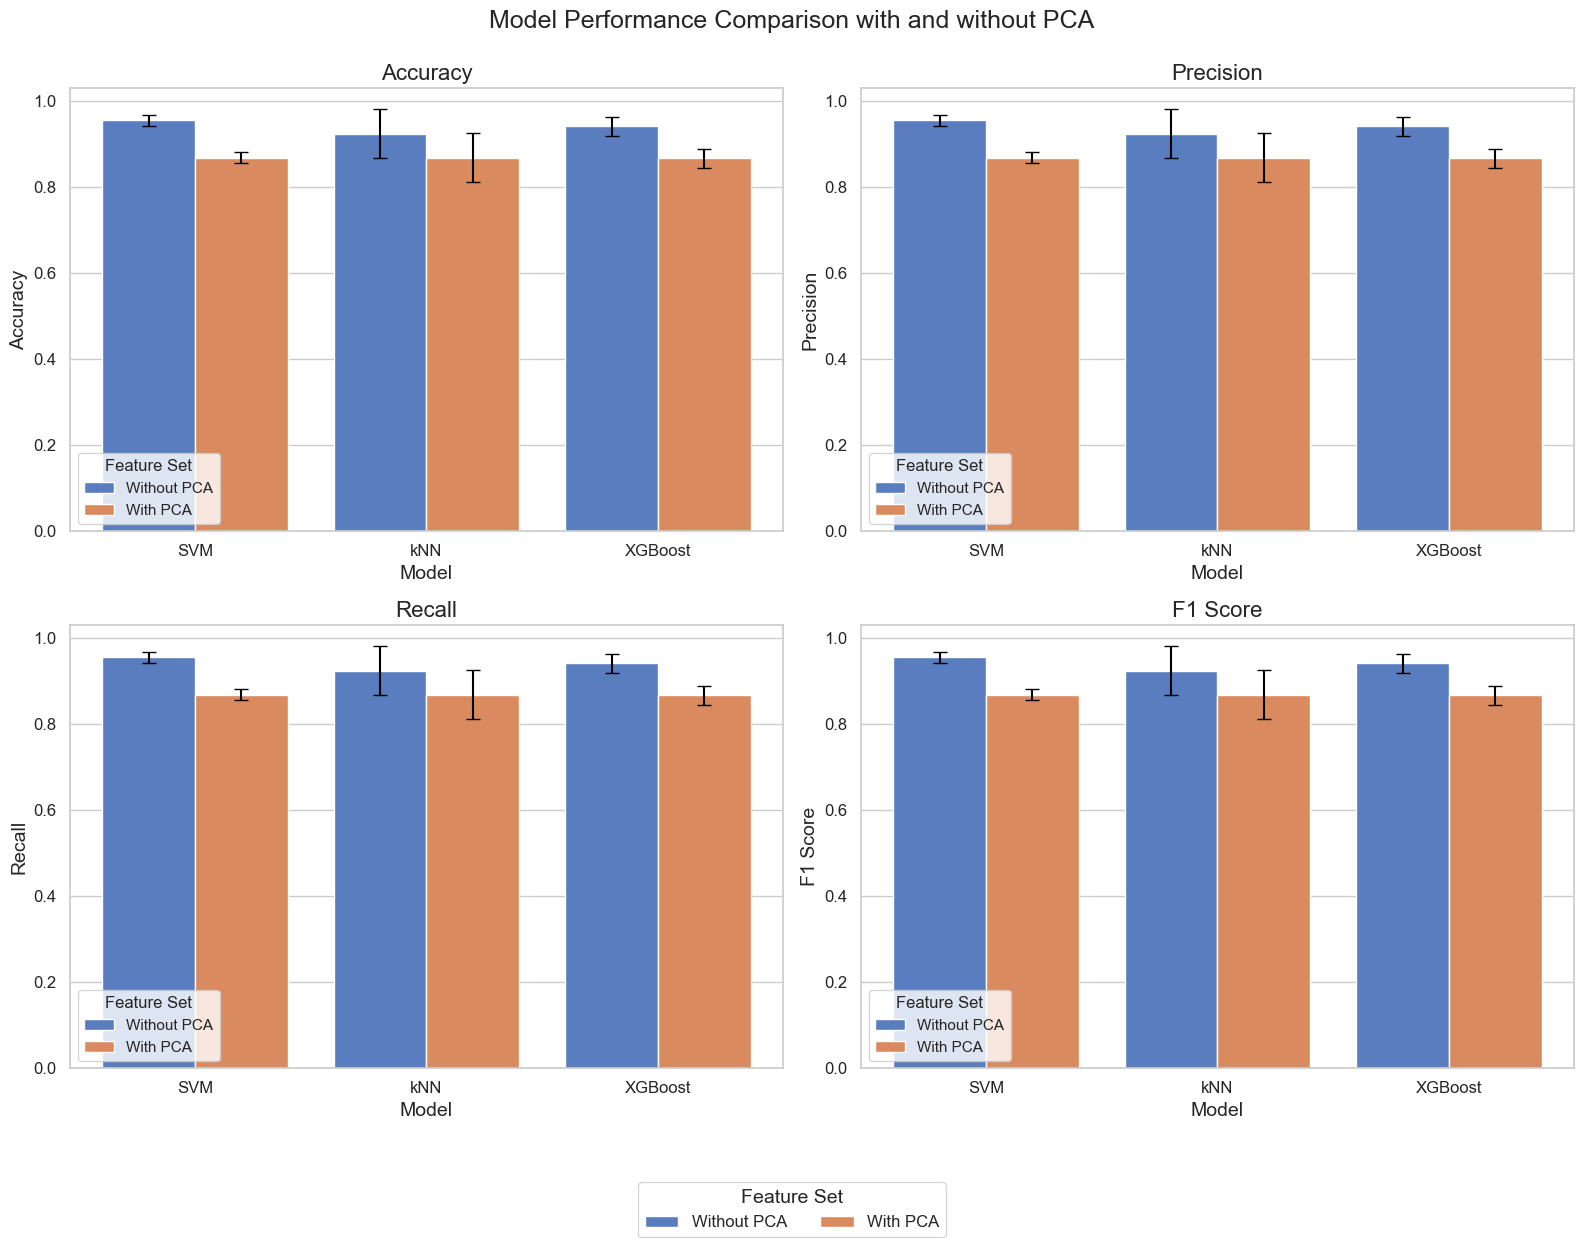

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
results_csv_path = '../data/results_table.csv'
results_table = pd.read_csv(results_csv_path)

# Plot configuration
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 12))

# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
std_metrics = ['Acc Std', 'Prec Std', 'Recall Std', 'F1 Std']

# Iterate over the metrics to create subplots
for i, (metric, std_metric) in enumerate(zip(metrics, std_metrics)):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each metric
    ax = sns.barplot(
        x='Model',
        y=metric,
        hue='Feature Set',
        data=results_table,
        palette='muted',
        errorbar=None  # we will add it manually
    )

    # Add error bars manually
    for container in ax.containers:
        if isinstance(container, plt.matplotlib.container.BarContainer):
            bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in container]
            ax.errorbar(bar_centers, container.datavalues, yerr=results_table[std_metric].values[:len(container)],
                        fmt='none', c='black', capsize=5, linewidth=1.5)

    plt.title(f'{metric}', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# Place a single legend outside the plot
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, title='Feature Set', bbox_to_anchor=(0.5, 0.01), fontsize=12, title_fontsize=14)

# Adjust the layout to make room for the legend
plt.tight_layout(rect=[0, 0.04, 1, 0.95])

# Add a main title
plt.suptitle('Model Performance Comparison with and without PCA', fontsize=18)

# Define the path for the results directory
results_dir = '../Results/ML_Performances'

# Create the Results directory if it doesn't exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

plt.savefig(os.path.join(results_dir, 'ML_Performances.png'))

# Show the plot
plt.show()

plt.close()

In [13]:
print(results_table)

     Model  Feature Set  Accuracy   Acc Std  Precision  Prec Std    Recall  \
0      SVM  Without PCA  0.954086  0.011973   0.954086  0.011973  0.954086   
1      SVM     With PCA  0.868731  0.058471   0.868731  0.058471  0.868731   
2      kNN  Without PCA  0.922655  0.022459   0.922655  0.022459  0.922655   
3      kNN     With PCA  0.865853  0.057379   0.865853  0.057379  0.865853   
4  XGBoost  Without PCA  0.940732  0.021516   0.940732  0.021516  0.940732   
5  XGBoost     With PCA  0.869038  0.050848   0.869038  0.050848  0.869038   

   Recall Std  F1 Score    F1 Std  
0    0.011973  0.954086  0.011973  
1    0.058471  0.868731  0.058471  
2    0.022459  0.922655  0.022459  
3    0.057379  0.865853  0.057379  
4    0.021516  0.940732  0.021516  
5    0.050848  0.869038  0.050848  
